In [126]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

# VEST ME 2020

## VEST's Documentation File

Election results by township from Maine Bureau of Corporations, Elections & Commissions (https://www.maine.gov/sos/cec/elec/results/index.html)  
Election results by ward from municipal reports for Auburn, Augusta, Belfast, Ellsworth, Gorham, Lewiston, Portland, Sanford, South Portland.  
  
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program. Voting district shapefiles were available for Androscoggin, Cumberland, Kennebec, Sagadahoc, Waldo, York. County subdivision shapefiles were used instead for Aroostook, Franklin, Hancock, Knox, Lincoln, Oxford, Penobscot, Piscataquis, Somerset, Washington.  
  
VTDs were merged for Bath, Brunswick, Saco, Waterville, Westbrook as statewide votes were not reported by ward. VTDs for Ellsworth and Gorham were sourced from township ward maps.  
  
Absentee votes were reported by township for Auburn, Augusta, Ellsworth, Gorham, Lewiston, Portland, Sanford, South Portland. Military and overseas ballots (UOCAVA) were reported statewide. These were distributed by candidate to precincts based on their share of the precinct-level vote for the given reporting unit.  
  
For Portland City the state reported 33786 votes for Joe Biden (D) and 6486 votes for Donald Trump (R). In the Senate election the state reported 28053 votes for Sara Gideon (D) and 8659 votes for Susan Collins (R). Amended precinct returns by Portland City add up to 33784 votes for Biden, 6483 votes for Trump, 28071 votes for Gideon, and 8656 votes for Collins.  
  
Maine features more than 400 unorganized townships and islands that do not lie within municipal bounds. While some are designated separately, the U.S. Census Bureau combines most of these into larger unorganized territories within each county. Voters in unorganized townships are assigned to nearby incorporated townships. In some cases these votes are reported separately while in others they are combined into the total vote reported from the central voting location. The shapefile has been modified accordingly with boundaries from the Town Boundaries shapefile provided by the Maine Office of GIS. For unorganized territories that are unpopulated or otherwise do not appear to have any registered voters the Census boundaries have been retained unaltered.  
  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Independent Party)  
G20PREAFUE - Roque De La Fuente (Alliance Party)  
  
G20USSDGID - Sara I. Gideon (Democratic Party)  
G20USSRCOL - Susan Margaret Collins (Republican Party)  
G20USSISAV - Lisa Savage (Independent)  
G20USSILIN - Max Patrick Linn (Independent)   

## Load VEST's Final File

In [127]:
vest_shp = gp.read_file("./raw-from-source/VEST/me_2020/me_2020.shp")

In [128]:
vest_shp.shape

(573, 13)

In [129]:
vest_shp.head(10)

,STATEFP20,COUNTY20,NAME20,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN,geometry
0,23,Cumberland,Baldwin,354,625,13,12,1,255,691,33,24,"POLYGON ((-70.80161 43.85608, -70.80158 43.856..."
1,23,Cumberland,Bridgton,1674,1532,56,28,2,1362,1735,133,51,"POLYGON ((-70.86660 44.08003, -70.86655 44.080..."
2,23,Waldo,Belmont,262,320,14,6,0,184,368,34,11,"POLYGON ((-69.17227 44.39808, -69.16779 44.398..."
3,23,Waldo,Waldo,229,262,4,10,0,174,286,31,17,"POLYGON ((-69.16001 44.46983, -69.15451 44.470..."
4,23,Waldo,Winterport,1045,1248,37,18,2,794,1414,104,35,"POLYGON ((-69.01417 44.67179, -69.01321 44.671..."
5,23,Kennebec,Augusta Ward 3,1346,698,34,12,2,1129,1395,164,80,"POLYGON ((-69.83423 44.34717, -69.83420 44.347..."
6,23,Kennebec,Augusta Ward 2,1209,692,42,12,1,941,988,95,26,"POLYGON ((-69.78702 44.29691, -69.78696 44.297..."
7,23,Kennebec,Augusta Ward 1,1269,457,23,10,0,1076,953,102,53,"POLYGON ((-69.83377 44.33209, -69.83342 44.333..."
8,23,Kennebec,Augusta Ward 4,1480,2318,121,71,8,1156,1481,112,51,"POLYGON ((-69.77199 44.31730, -69.77164 44.318..."
9,23,Kennebec,Belgrade,1005,1169,35,19,1,790,1308,97,33,"POLYGON ((-69.91535 44.50049, -69.91529 44.500..."


<AxesSubplot:>

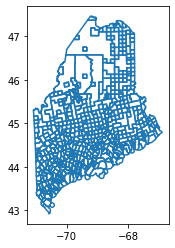

In [130]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST, and cleaned them in Excel. Results do not require pivoting. 

In [131]:
pres_results = pd.read_csv('./raw-from-source/SOS/president_clean.csv')
sen_results = pd.read_csv('./raw-from-source/SOS/ussenator_clean.csv')
pres_results["join_col"]=pres_results['County']+pres_results['Precinct']
sen_results["join_col"]=sen_results['County']+sen_results['Precinct']
pres_results['join_col']=pres_results['join_col'].str.strip()
sen_results['join_col']=sen_results['join_col'].str.strip()

In [132]:
join_attempt_one = pd.merge(pres_results,sen_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          516
left_only       0
right_only      0
Name: _merge, dtype: int64


In [133]:
election_results = join_attempt_one.copy()

In [134]:
election_results.head(1)

,County_x,Precinct_x,"Biden, Joseph R.","De La Fuente, Roque","Hawkins, Howard","Jorgensen, Jo","Trump, Donald J.",join_col,County_y,Precinct_y,"Collins, Susan Margaret","Gideon, Sara I.","Linn, Max Patrick","Savage, Lisa",_merge
0,AND,Auburn,6482,25,122,244,5409,ANDAuburn,AND,Auburn,6242,5213,250,578,both


In [135]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Maine"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
me_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "23" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [136]:
me_fips_dict

{'ANDROSCOGGIN': '001',
 'AROOSTOOK': '003',
 'CUMBERLAND': '005',
 'FRANKLIN': '007',
 'HANCOCK': '009',
 'KENNEBEC': '011',
 'KNOX': '013',
 'LINCOLN': '015',
 'OXFORD': '017',
 'PENOBSCOT': '019',
 'PISCATAQUIS': '021',
 'SAGADAHOC': '023',
 'SOMERSET': '025',
 'WALDO': '027',
 'WASHINGTON': '029',
 'YORK': '031'}

In [137]:
election_results["County_x"].unique()

array(['AND', 'ARO', 'CUM', 'FRA', 'HAN', 'KEN', 'KNO', 'LIN', 'OXF',
       'PEN', 'PIS', 'SAG', 'SOM', 'WAL', 'WAS', 'YOR'], dtype=object)

In [138]:
County_dict = {
    'AND':'ANDROSCOGGIN', 
    'ARO':'AROOSTOOK', 
    'CUM':'CUMBERLAND', 
    'FRA':'FRANKLIN', 
    'HAN':'HANCOCK', 
    'KEN':'KENNEBEC', 
    'KNO':'KNOX', 
    'LIN':'LINCOLN', 
    'OXF':'OXFORD',
    'PEN':'PENOBSCOT', 
    'PIS':'PISCATAQUIS', 
    'SAG':'SAGADAHOC', 
    'SOM':'SOMERSET', 
    'WAL':'WALDO', 
    'WAS':'WASHINGTON', 
    'YOR':'YORK'
}

In [139]:
#Use the dictionary to change the names
election_results["County_x"]=election_results["County_x"].map(County_dict).fillna(election_results["County_x"])

In [140]:
#Map to the correct FIP
election_results["County_FIPS"]=election_results["County_x"].map(me_fips_dict).fillna(election_results["County_x"])

#Print out the FIPS to make sure they all are in the correct format
election_results["County_x"].unique()

array(['ANDROSCOGGIN', 'AROOSTOOK', 'CUMBERLAND', 'FRANKLIN', 'HANCOCK',
       'KENNEBEC', 'KNOX', 'LINCOLN', 'OXFORD', 'PENOBSCOT',
       'PISCATAQUIS', 'SAGADAHOC', 'SOMERSET', 'WALDO', 'WASHINGTON',
       'YORK'], dtype=object)

In [141]:
election_results = election_results.drop(['join_col', 'County_y','Precinct_y','_merge'], axis=1)

In [142]:
election_results = election_results[["County_x","Precinct_x","County_FIPS","Biden, Joseph R.","Trump, Donald J.","Jorgensen, Jo","Hawkins, Howard","De La Fuente, Roque","Gideon, Sara I.","Collins, Susan Margaret","Savage, Lisa","Linn, Max Patrick"]]

In [143]:
election_results.columns = ["County","Precinct","County_FIPS","G20PREDBID","G20PRERTRU","G20PRELJOR","G20PREGHAW","G20PREAFUE","G20USSDGID","G20USSRCOL","G20USSISAV","G20USSILIN"]

In [144]:
election_results.head(1)

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,ANDROSCOGGIN,Auburn,001,6482,5409,244,122,25,5213,6242,578,250


In [145]:
vest_shp['COUNTY20']=vest_shp['COUNTY20'].str.upper()
vest_shp["County_FIPS"]=vest_shp["COUNTY20"].map(me_fips_dict).fillna(vest_shp["COUNTY20"])
vest_shp

,STATEFP20,COUNTY20,NAME20,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN,geometry,County_FIPS
0,23,CUMBERLAND,Baldwin,354,625,13,12,1,255,691,33,24,"POLYGON ((-70.80161 43.85608, -70.80158 43.856...",005
1,23,CUMBERLAND,Bridgton,1674,1532,56,28,2,1362,1735,133,51,"POLYGON ((-70.86660 44.08003, -70.86655 44.080...",005
2,23,WALDO,Belmont,262,320,14,6,0,184,368,34,11,"POLYGON ((-69.17227 44.39808, -69.16779 44.398...",027
3,23,WALDO,Waldo,229,262,4,10,0,174,286,31,17,"POLYGON ((-69.16001 44.46983, -69.15451 44.470...",027
4,23,WALDO,Winterport,1045,1248,37,18,2,794,1414,104,35,"POLYGON ((-69.01417 44.67179, -69.01321 44.671...",027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,23,PISCATAQUIS,Northeast Piscataquis,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((-69.44439 45.67220, -69.44426 ...",021
569,23,PISCATAQUIS,Millinocket Piscataquis,26,61,0,0,0,21,63,0,0,"POLYGON ((-68.82293 45.94618, -68.82295 45.943...",021
570,23,PENOBSCOT,Medway/Grindstone/Soldiertown,197,551,12,1,0,149,571,17,17,"MULTIPOLYGON (((-68.43349 45.57594, -68.43349 ...",019
571,23,PISCATAQUIS,Brownville/Barnard/Ebeemee/Williamsburg/T4 R9,283,468,27,5,1,225,489,43,19,"POLYGON ((-69.10023 45.28849, -69.10509 45.287...",021


## Compare vote totals before allocation

In [146]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PREDBID',
 'G20PRERTRU',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PREAFUE',
 'G20USSDGID',
 'G20USSRCOL',
 'G20USSISAV',
 'G20USSILIN']

In [147]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

1638339
1626983


## Function to assign absentee votes by town

In [148]:
def assign_absentee(filtered_election):
    to_dole_out = filtered_election[filtered_election['Precinct']=='Absentee']
    to_dole_out_totals = to_dole_out
    filtered_election = filtered_election[filtered_election.Precinct != 'Absentee']
    #Create a df with the county-by-county sums of precinct-level votes, this will be used in the allocation, clean the index
    precinct_specific_totals = pd.DataFrame(filtered_election.groupby(["County"]).sum())
    precinct_specific_totals.reset_index(inplace=True,drop=False)
    filtered_election.reset_index(inplace=True,drop=True)
    
    for race in races:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        filtered_election.loc[:,add_var]=0.0
        filtered_election.loc[:,rem_var]=0.0
        filtered_election.loc[:,floor_var]=0.0
    
    for index, row in filtered_election.iterrows():
        #No countywide votes for 510
        if row["County"] in to_dole_out['County'].unique():
            for race in races:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the county
                county_id = row["County"]
                #Get the denominator for the allocation (the precinct vote totals)
                denom = precinct_specific_totals.loc[precinct_specific_totals["County"]==county_id][race]
                #Get one of the numerators, how many countywide votes to allocate
                numer = to_dole_out_totals.loc[to_dole_out_totals["County"]==county_id][race]

                #Get the vote totals for this race in this precinct
                val = filtered_election.loc[index,race]

                #Get the vote share, the precincts % of total precinct votes in the county times votes to allocate
                if float(denom) !=0:
                    vote_share = (float(val)/float(denom))*float(numer)
                else:
                    vote_share = 0


                filtered_election.loc[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                filtered_election.loc[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                filtered_election.loc[index,floor_var] = np.floor(vote_share)
                
    #After the first pass through, get the sums of the races by county            
    first_allocation = pd.DataFrame(filtered_election.groupby(["County"]).sum())

    #Now we want to iterate county by county to work on rounding
    county_list = list(to_dole_out_totals["County"].unique()) 

    #Iterate over the counties
    for county in county_list:
        for race in races:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #Count how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals["County"]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in filtered_election.loc[filtered_election["County"]==county][rem_var].nlargest(to_go).index:
                filtered_election.loc[index,add_var] = np.ceil(filtered_election.loc[index,add_var])

    #Iterate over every race again
    for race in races:
        add_var = race+"_add"
        #Round every allocation down
        filtered_election.loc[:,add_var]=np.floor(filtered_election.loc[:,add_var])
        #Add every allocation to the total
        filtered_election.loc[:,race]+=filtered_election.loc[:,add_var]


    #Filter back down to the original columns
    filtered_election = filtered_election[list(election_results.columns)]
    return filtered_election

## Assign votes by ward for Auburn, Augusta, Belfast, Ellsworth, Gorham, Lewiston, Portland, Sanford, South Portland.  
  
VEST:  
-Election results by ward from municipal reports for Auburn, Augusta, Belfast, Ellsworth, Gorham, Lewiston, Portland, Sanford, South Portland.  
-Absentee votes were reported by township for Auburn, Augusta, Ellsworth, Gorham, Lewiston, Portland, Sanford, South Portland.  

### Auburn
Source-https://www.auburnmaine.gov/CMSContent/City_Clerk/OFFICIAL%20RESULTS%20NOV%202020.pdf

In [149]:
Auburn_dict = {'County':['ANDROSCOGGIN', 'ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN'],
        'Precinct':['Auburn Ward 1/2', 'Auburn Ward 3/4','Auburn Ward 5','Absentee'],
        'County_FIPS':['001', '001','001','001'],
        'G20PREDBID':[589,424,264,5205],
        'G20PRERTRU':[994,937,560,2918],
        'G20PRELJOR':[52,34,28,130],
        'G20PREGHAW':[17,13,12,80],
        'G20PREAFUE':[2,5,1,17],
        'G20USSDGID':[516,358,223,4116],
        'G20USSRCOL':[1042,963,573,3664],
        'G20USSISAV':[64,57,44,413],
        'G20USSILIN':[31,32,25,162]               
       }
Auburn_df = pd.DataFrame(Auburn_dict)
Auburn_df = assign_absentee(Auburn_df)
Auburn_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,ANDROSCOGGIN,Auburn Ward 1/2,001,2990.0,2158.0,111.0,49.0,6.0,2452.0,2523.0,224.0,88.0
1,ANDROSCOGGIN,Auburn Ward 3/4,001,2152.0,2035.0,73.0,38.0,16.0,1701.0,2332.0,200.0,91.0
2,ANDROSCOGGIN,Auburn Ward 5,001,1340.0,1216.0,60.0,35.0,3.0,1060.0,1387.0,154.0,71.0


### Augusta
source-https://cms6.revize.com/revize/augustame/Official%20State%20and%20City%20ROVC%20November%2003%202020%20Signed.pdf

In [150]:
Augusta_dict = {'County':['KENNEBEC', 'KENNEBEC','KENNEBEC','KENNEBEC','KENNEBEC'],
        'Precinct':['Augusta Ward 1', 'Augusta Ward 2', 'Augusta Ward 3','Augusta Ward 4','Absentee'],
        'County_FIPS':['011', '011','011','011','011'],
        'G20PREDBID':[230,219,244,268,4287],
        'G20PRERTRU':[419,410,620,626,2080],
        'G20PRELJOR':[19,21,37,31,110],
        'G20PREGHAW':[17,8,10,10,59],
        'G20PREAFUE':[0,0,1,2,8],
        'G20USSDGID':[201,176,211,216,3447],
        'G20USSRCOL':[433,449,634,673,2614],
        'G20USSISAV':[30,28,48,33,329],
        'G20USSILIN':[18,9,27,17,136]
       }
Augusta_df = pd.DataFrame(Augusta_dict)
Augusta_df = assign_absentee(Augusta_df)
Augusta_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,KENNEBEC,Augusta Ward 1,011,1256.0,839.0,38.0,39.0,0.0,1063.0,950.0,101.0,52.0
1,KENNEBEC,Augusta Ward 2,011,1196.0,821.0,42.0,19.0,0.0,930.0,985.0,94.0,26.0
2,KENNEBEC,Augusta Ward 3,011,1332.0,1241.0,75.0,23.0,4.0,1116.0,1391.0,162.0,79.0
3,KENNEBEC,Augusta Ward 4,011,1464.0,1254.0,63.0,23.0,7.0,1142.0,1477.0,111.0,50.0


### Belfast
source-https://www.cityofbelfast.org/DocumentCenter/View/4509/City-Clerks-Return-State-Election-Results-?bidId=

In [151]:
Belfast_dict = {'County':['WALDO', 'WALDO','WALDO'],
        'Precinct':['Belfast Ward 1/2', 'Belfast Ward 3/4', 'Belfast Ward 5'],
        'County_FIPS':['027', '027','027'],
        'G20PREDBID':[1255,1190,402],
        'G20PRERTRU':[335,548,376],
        'G20PRELJOR':[14,32,10],
        'G20PREGHAW':[25,39,7],
        'G20PREAFUE':[2,2,0],
        'G20USSDGID':[1030,964,315],
        'G20USSRCOL':[472,646,423],
        'G20USSISAV':[125,179,48],
        'G20USSILIN':[12,21,14]
       }
Belfast_df = pd.DataFrame(Belfast_dict)
Belfast_df

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,WALDO,Belfast Ward 1/2,027,1255,335,14,25,2,1030,472,125,12
1,WALDO,Belfast Ward 3/4,027,1190,548,32,39,2,964,646,179,21
2,WALDO,Belfast Ward 5,027,402,376,10,7,0,315,423,48,14


### Ellsworth
source-https://www.ellsworthmaine.gov/wp-content/uploads/2020/11/2020-Ellsworth-Election-Results-1.png

In [152]:
Ellsworth_dict = {'County':['HANCOCK','HANCOCK','HANCOCK','HANCOCK','HANCOCK'],
        'Precinct':['Ellsworth 1',"Ellsworth 2/Fletcher's Landing",'Ellsworth 3','Ellsworth 4','Absentee'],
        'County_FIPS':['009','009','009','009','009'],
        'G20PREDBID':[203,102,101,190,1677],
        'G20PRERTRU':[401,284,338,434,899],
        'G20PRELJOR':[21,20,8,19,53],
        'G20PREGHAW':[14,4,3,11,28],
        'G20PREAFUE':[2,0,1,1,6],
        'G20USSDGID':[172,69,78,148,1342],
        'G20USSRCOL':[414,313,341,456,1122],
        'G20USSISAV':[35,13,11,30,151],
        'G20USSILIN':[23,15,16,24,58]
       }
Ellsworth_df = pd.DataFrame(Ellsworth_dict)
Ellsworth_df = assign_absentee(Ellsworth_df)
Ellsworth_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,HANCOCK,Ellsworth 1,009,774.0,648.0,37.0,26.0,5.0,666.0,719.0,94.0,40.0
1,HANCOCK,Ellsworth 2/Fletcher's Landing,009,389.0,459.0,36.0,7.0,0.0,267.0,543.0,35.0,26.0
2,HANCOCK,Ellsworth 3,009,385.0,547.0,14.0,6.0,3.0,302.0,592.0,30.0,28.0
3,HANCOCK,Ellsworth 4,009,725.0,702.0,34.0,21.0,2.0,574.0,792.0,81.0,42.0


### Gorham
source-https://www.gorham-me.org/sites/g/files/vyhlif4456/f/uploads/election_results_11-03-2020.pdf

In [153]:
Gorham_dict = {'County':['CUMBERLAND', 'CUMBERLAND','CUMBERLAND','CUMBERLAND'],
        'Precinct':['Gorham 1-1', 'Gorham 1-2', 'Gorham 2','Absentee'],
        'County_FIPS':['005', '005','005','005'],
        'G20PREDBID':[344,279,491,5346],
        'G20PRERTRU':[496,518,911,2350],
        'G20PRELJOR':[23,25,46,123],
        'G20PREGHAW':[10,9,23,88],
        'G20PREAFUE':[3,0,3,19],
        'G20USSDGID':[263,231,387,4257],
        'G20USSRCOL':[564,566,1001,3230],
        'G20USSISAV':[36,27,56,367],
        'G20USSILIN':[17,14,33,95]
       }
Gorham_df = pd.DataFrame(Gorham_dict)
Gorham_df = assign_absentee(Gorham_df)
Gorham_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,CUMBERLAND,Gorham 1-1,005,1995.0,1102.0,53.0,31.0,13.0,1534.0,1419.0,147.0,42.0
1,CUMBERLAND,Gorham 1-2,005,1618.0,1150.0,58.0,28.0,0.0,1347.0,1424.0,110.0,35.0
2,CUMBERLAND,Gorham 2,005,2847.0,2023.0,106.0,71.0,12.0,2257.0,2518.0,229.0,82.0


### Lewiston
source-https://www.lewistonmaine.gov/DocumentCenter/View/11785/Official-1132020-General-Election-Results?bidId=

In [154]:
Lewiston_dict = {'County':['ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN'],
        'Precinct':['Lewiston Ward 1/3','Lewiston Ward 2','Lewiston Ward 4','Lewiston Ward 5/7','Lewiston Ward 6','Absentee'],
        'County_FIPS':['001','001','001','001','001','001'],
        'G20PREDBID':[501,252,233,451,200,7979],
        'G20PRERTRU':[623,677,522,760,715,3935],
        'G20PRELJOR':[33,30,30,32,31,152],
        'G20PREGHAW':[24,8,8,13,7,144],
        'G20PREAFUE':[2,2,0,5,2,17],
        'G20USSDGID':[478,213,203,423,171,6518],
        'G20USSRCOL':[636,701,542,770,732,5000],
        'G20USSISAV':[50,23,33,47,25,514],
        'G20USSILIN':[27,27,12,28,23,184]
       }
Lewiston_df = pd.DataFrame(Lewiston_dict)
Lewiston_df = assign_absentee(Lewiston_df)
Lewiston_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,ANDROSCOGGIN,Lewiston Ward 1/3,001,2943.0,1367.0,65.0,82.0,5.0,2572.0,1577.0,194.0,70.0
1,ANDROSCOGGIN,Lewiston Ward 2,001,1480.0,1485.0,60.0,27.0,5.0,1146.0,1738.0,90.0,69.0
2,ANDROSCOGGIN,Lewiston Ward 4,001,1369.0,1145.0,59.0,27.0,0.0,1092.0,1343.0,128.0,31.0
3,ANDROSCOGGIN,Lewiston Ward 5/7,001,2649.0,1667.0,63.0,44.0,13.0,2276.0,1909.0,183.0,72.0
4,ANDROSCOGGIN,Lewiston Ward 6,001,1175.0,1568.0,61.0,24.0,5.0,920.0,1814.0,97.0,59.0


### Portland
source-https://www.portlandmaine.gov/DocumentCenter/View/29465/Amended-Official-Election-Results-Nov-3-2020-Election

In [155]:
Portland_dict = {'County':['CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND'],
        'Precinct':['Portland 1-1','Portland 1-2','Portland 1-3','Portland 2-1','Portland 2-2','Portland 3-1','Portland 3-2','Portland 4-1','Portland 4-2','Portland 5-1','Portland 5-2','Absentee'],
        'County_FIPS':['005','005','005','005','005','005','005','005','005','005','005','005'],
        'G20PREDBID':[598,534,347,862,695,683,546,738,558,516,645,27064],
        'G20PRERTRU':[184,218,68,179,184,330,367,390,386,353,654,3173],
        'G20PRELJOR':[17,22,4,31,26,27,19,34,14,17,38,270],
        'G20PREGHAW':[15,28,6,19,29,28,10,23,11,17,14,490],
        'G20PREAFUE':[5,0,0,2,1,5,1,1,0,0,1,40],
        'G20USSDGID':[469,453,313,714,566,544,437,604,471,432,523,22527],
        'G20USSRCOL':[224,246,82,232,206,403,420,452,434,405,745,4810],
        'G20USSISAV':[117,91,34,140,162,115,72,114,59,61,65,3480],
        'G20USSILIN':[10,17,1,12,5,15,13,22,6,9,14,211]
       }
Portland_df = pd.DataFrame(Portland_dict)
Portland_df = assign_absentee(Portland_df)
Portland_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,CUMBERLAND,Portland 1-1,005,3006.0,360.0,36.0,52.0,18.0,2381.0,504.0,512.0,27.0
1,CUMBERLAND,Portland 1-2,005,2684.0,427.0,46.0,97.0,0.0,2300.0,553.0,399.0,46.0
2,CUMBERLAND,Portland 1-3,005,1744.0,133.0,8.0,21.0,0.0,1589.0,185.0,149.0,3.0
3,CUMBERLAND,Portland 2-1,005,4333.0,350.0,65.0,65.0,7.0,3625.0,522.0,613.0,32.0
4,CUMBERLAND,Portland 2-2,005,3493.0,360.0,54.0,100.0,4.0,2873.0,463.0,709.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6,CUMBERLAND,Portland 3-2,005,2744.0,719.0,40.0,34.0,3.0,2218.0,945.0,315.0,35.0
7,CUMBERLAND,Portland 4-1,005,3709.0,764.0,71.0,79.0,3.0,3066.0,1017.0,499.0,59.0
8,CUMBERLAND,Portland 4-2,005,2805.0,756.0,29.0,38.0,0.0,2391.0,976.0,258.0,16.0
9,CUMBERLAND,Portland 5-1,005,2593.0,691.0,35.0,59.0,0.0,2193.0,911.0,267.0,24.0


In [156]:
vest_shp[vest_shp['NAME20'].str.contains('South Portland')]

,STATEFP20,COUNTY20,NAME20,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN,geometry,County_FIPS
118,23,CUMBERLAND,South Portland Ward 2,2228,588,35,52,4,1798,817,221,34,"POLYGON ((-70.26372 43.64182, -70.26303 43.641...",005
119,23,CUMBERLAND,South Portland Ward 1,2436,560,38,41,2,1904,801,260,23,"POLYGON ((-70.24782 43.65197, -70.24428 43.654...",005
120,23,CUMBERLAND,South Portland Ward 5,2883,830,44,44,2,2530,1012,255,40,"POLYGON ((-70.37054 43.64244, -70.35482 43.644...",005
543,23,CUMBERLAND,South Portland Ward 3/4,4657,1813,108,55,9,3888,2326,436,65,"POLYGON ((-70.31439 43.62517, -70.31439 43.625...",005


### Sanford
source-https://www.sanfordmaine.org/vertical/sites/%7B9A3D3C8D-76EE-4CC5-B86E-C19FDBF5E473%7D/uploads/OFFICIAL_STATE_TALLY_NOV_3_2020.pdf

In [157]:
Sanford_dict = {'County':['YORK','YORK','YORK','YORK'],
        'Precinct':['Sanford Ward 1','Sanford Ward 2','Sanford Ward 3','Absentee'],
        'County_FIPS':['031','031','031','031'],
        'G20PREDBID':[409,532,381,4070],
        'G20PRERTRU':[897,1053,977,2255],
        'G20PRELJOR':[35,50,32,102],
        'G20PREGHAW':[14,16,12,73],
        'G20PREAFUE':[0,1,3,19],
        'G20USSDGID':[328,446,278,3176],
        'G20USSRCOL':[932,1058,1038,2854],
        'G20USSISAV':[53,92,48,327],
        'G20USSILIN':[33,46,35,144]
       }
Sanford_df = pd.DataFrame(Sanford_dict)
Sanford_df = assign_absentee(Sanford_df)
Sanford_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,YORK,Sanford Ward 1,031,1668.0,1588.0,65.0,38.0,0.0,1318.0,1811.0,143.0,75.0
1,YORK,Sanford Ward 2,031,2170.0,1864.0,94.0,44.0,6.0,1793.0,2055.0,248.0,104.0
2,YORK,Sanford Ward 3,031,1554.0,1730.0,60.0,33.0,17.0,1117.0,2016.0,129.0,79.0


### South Portland
source-https://www.southportland.org/files/6216/0709/2585/ELECTION_DAY_OFFICIAL_RESULTS.pdf

In [158]:
SouthPortland_dict = {'County':['CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND'],
        'Precinct':['South Portland Ward 1','South Portland Ward 2','South Portland Ward 3/4','South Portland Ward 5','Absentee'],
        'County_FIPS':['005','005','005','005','005'],
        'G20PREDBID':[397,363,759,470,10086],
        'G20PRERTRU':[248,260,802,367,2106],
        'G20PRELJOR':[17,16,49,20,120],
        'G20PREGHAW':[11,14,15,12,136],
        'G20PREAFUE':[1,2,4,1,9],
        'G20USSDGID':[307,290,627,408,8369],
        'G20USSRCOL':[308,314,894,389,3038],
        'G20USSISAV':[52,44,87,51,928],
        'G20USSILIN':[9,13,25,15,98]
       }
SouthPortland_df = pd.DataFrame(SouthPortland_dict)
SouthPortland_df = assign_absentee(SouthPortland_df)
SouthPortland_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,CUMBERLAND,South Portland Ward 1,005,2410.0,559.0,37.0,40.0,2.0,1882.0,799.0,258.0,23.0
1,CUMBERLAND,South Portland Ward 2,005,2204.0,587.0,35.0,51.0,4.0,1777.0,815.0,219.0,34.0
2,CUMBERLAND,South Portland Ward 3/4,005,4608.0,1809.0,107.0,54.0,9.0,3842.0,2320.0,432.0,64.0
3,CUMBERLAND,South Portland Ward 5,005,2853.0,828.0,43.0,43.0,2.0,2500.0,1009.0,253.0,39.0


In [159]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

1638339
1626983


In [160]:
election_results['Precinct']=election_results['Precinct'].str.upper()
Precincts=['AUBURN', 'AUGUSTA', 'BELFAST', 'ELLSWORTH', 'GORHAM', 'LEWISTON', 'PORTLAND', 'SANFORD', 'SOUTH PORTLAND']

In [161]:
pd.set_option('display.max_rows', 20)
print(election_results[election_results['Precinct'].isin(Precincts)])
pd.set_option('display.max_rows', 10)

           County        Precinct County_FIPS  G20PREDBID  G20PRERTRU  \
0    ANDROSCOGGIN          AUBURN         001        6482        5409   
4    ANDROSCOGGIN        LEWISTON         001        9616        7232   
96     CUMBERLAND          GORHAM         005        6460        4275   
104    CUMBERLAND        PORTLAND         005       33786        6486   
109    CUMBERLAND  SOUTH PORTLAND         005       12075        3783   
149       HANCOCK       ELLSWORTH         009        2274        2359   
177      KENNEBEC         AUGUSTA         011        5248        4155   
412         WALDO         BELFAST         027        2847        1259   
510          YORK         SANFORD         031        5392        5182   

     G20PRELJOR  G20PREGHAW  G20PREAFUE  G20USSDGID  G20USSRCOL  G20USSISAV  \
0           244         122          25        5213        6242         578   
4           308         204          28        8006        8381         692   
96          217         130     

In [162]:
#Delete precincts results from SOS file
election_results = election_results[~election_results['Precinct'].isin(Precincts)]

In [163]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

1638339
1370325


In [164]:
#Add precinct results from towns
#
election_results = pd.concat([election_results,Auburn_df,Augusta_df,Belfast_df,Ellsworth_df,Gorham_df,Lewiston_df,Portland_df,Sanford_df,SouthPortland_df], ignore_index = True)

In [165]:
election_results

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,ANDROSCOGGIN,DURHAM,001,1361.0,1333.0,63.0,26.0,7.0,1031.0,1571.0,162.0,39.0
1,ANDROSCOGGIN,GREENE,001,914.0,1663.0,33.0,26.0,4.0,683.0,1829.0,92.0,38.0
2,ANDROSCOGGIN,LEEDS,001,505.0,818.0,27.0,9.0,3.0,392.0,896.0,52.0,22.0
3,ANDROSCOGGIN,LISBON,001,2190.0,2853.0,126.0,60.0,14.0,1743.0,3133.0,253.0,122.0
4,ANDROSCOGGIN,LIVERMORE,001,573.0,783.0,25.0,10.0,3.0,449.0,883.0,33.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
542,YORK,Sanford Ward 3,031,1554.0,1730.0,60.0,33.0,17.0,1117.0,2016.0,129.0,79.0
543,CUMBERLAND,South Portland Ward 1,005,2410.0,559.0,37.0,40.0,2.0,1882.0,799.0,258.0,23.0
544,CUMBERLAND,South Portland Ward 2,005,2204.0,587.0,35.0,51.0,4.0,1777.0,815.0,219.0,34.0
545,CUMBERLAND,South Portland Ward 3/4,005,4608.0,1809.0,107.0,54.0,9.0,3842.0,2320.0,432.0,64.0


### Allocate UOCAVA votes

In [166]:
data = [['ABS','Absentee','000',4599,838,147,119,10,4068,1089,363,113]]
 
# Create dataframe of absentee votes
to_dole_out_totals = pd.DataFrame(data, columns = ["County","Precinct","County_FIPS","G20PREDBID","G20PRERTRU","G20PRELJOR","G20PREGHAW","G20PREAFUE","G20USSDGID","G20USSRCOL","G20USSISAV","G20USSILIN"])


In [167]:
df_with_absentee_reallocated = election_results.copy()

In [168]:
totals = pd.DataFrame(df_with_absentee_reallocated.sum())
precinct_vote_total_across_districts = totals.T

In [169]:
precinct_vote_total_across_districts

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,ANDROSCOGGINANDROSCOGGINANDROSCOGGINANDROSCOGG...,DURHAMGREENELEEDSLISBONLIVERMORELIVERMORE FALL...,0010010010010010010010010010010010010030030030...,430472.0,359896.0,14005.0,8111.0,1173.0,343155.0,416552.0,40216.0,13395.0


In [170]:
to_dole_out_totals

,County,Precinct,County_FIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSDGID,G20USSRCOL,G20USSISAV,G20USSILIN
0,ABS,Absentee,000,4599,838,147,119,10,4068,1089,363,113


In [171]:
races=["G20PREDBID","G20PRERTRU","G20PRELJOR","G20PREGHAW","G20PREAFUE","G20USSDGID","G20USSRCOL","G20USSISAV","G20USSILIN"]


#Create some new columns for each of these races to deal with the allocation
for race in races:
    add_var = race+"_fed_add"
    rem_var = race+"_fed_rem"
    floor_var = race+"_fed_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

for index, row in df_with_absentee_reallocated.iterrows():
    for race in races:
            add_var = race+"_fed_add"
            rem_var = race+"_fed_rem"
            floor_var = race+"_fed_floor"
            #Get the denominator for the allocation (the precinct vote totals)
            denom = precinct_vote_total_across_districts.iloc[0][race]
            #Get one of the numerators, how many countywide votes to allocate
            numer = to_dole_out_totals.iloc[0][race]
            #Get the vote totals for this race in this precinct
            val = df_with_absentee_reallocated.at[index,race]
            #Get the vote share, the precincts % of total precinct votes in the county times votes to allocate
            vote_share = (float(val)/float(denom))*float(numer)
            df_with_absentee_reallocated.at[index,add_var] = vote_share
            #Take the decimal remainder of the allocation
            df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
            #Take the floor of the allocation
            df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)
            
#After the first pass through, get the sums of the races by county 
totals = pd.DataFrame(df_with_absentee_reallocated.sum())
first_allocation = totals.T

for race in races:
    add_var = race+"_fed_add"
    rem_var = race+"_fed_rem"
    floor_var = race+"_fed_floor"
    #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
    to_go = int(np.round((int(to_dole_out_totals.iloc[0][race])-first_allocation.iloc[0][floor_var])))
    #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
    for index in df_with_absentee_reallocated[rem_var].nlargest(to_go).index:
        df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in races:
    add_var = race+"_fed_add"
    #Round every allocation down
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]
    
#Filter back down to the original columns
df_with_absentee_reallocated = df_with_absentee_reallocated[list(election_results.columns)]

In [172]:
df_with_absentee_reallocated['County_FIPS'].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031'], dtype=object)

In [173]:
vest_shp['COUNTY20'].unique()

array(['CUMBERLAND', 'WALDO', 'KENNEBEC', 'SAGADAHOC', 'YORK',
       'ANDROSCOGGIN', 'FRANKLIN', 'WASHINGTON', 'PISCATAQUIS',
       'PENOBSCOT', 'AROOSTOOK', 'OXFORD', 'SOMERSET', 'HANCOCK',
       'LINCOLN', 'KNOX'], dtype=object)

In [174]:
election_results = df_with_absentee_reallocated.copy()

## Compare Election Result Totals

### Compare Vote Totals

In [175]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

1638339
1638321.0


### Compare Race Totals

In [176]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [177]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PREDBID has a difference of -1.0 votes
	VEST: 435070 votes
	SOURCES: 435071.0 votes
G20PRERTRU is equal 	VEST / RDH: 360734
G20PRELJOR is equal 	VEST / RDH: 14152
G20PREGHAW is equal 	VEST / RDH: 8230
G20PREAFUE is equal 	VEST / RDH: 1183
G20USSDGID has a difference of 18.0 votes
	VEST: 347241 votes
	SOURCES: 347223.0 votes
G20USSRCOL has a difference of 1.0 votes
	VEST: 417642 votes
	SOURCES: 417641.0 votes
G20USSISAV is equal 	VEST / RDH: 40579
G20USSILIN is equal 	VEST / RDH: 13508


### Compare County Totals

In [178]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [179]:
county_totals_check(vest_shp,election_results,races,'County_FIPS')

***Countywide Totals Check***

G20PREDBID contains differences in these counties:
	005 has a difference of -2.0 votes
		VEST: 130132 votes
		SOURCES: 130134.0 votes
	009 has a difference of 1.0 votes
		VEST: 19576 votes
		SOURCES: 19575.0 votes
G20PRERTRU contains differences in these counties:
	005 has a difference of -3.0 votes
		VEST: 59720 votes
		SOURCES: 59723.0 votes
	009 has a difference of 3.0 votes
		VEST: 15015 votes
		SOURCES: 15012.0 votes
G20PRELJOR contains differences in these counties:
	003 has a difference of 1.0 votes
		VEST: 423 votes
		SOURCES: 422.0 votes
	005 has a difference of 1.0 votes
		VEST: 2997 votes
		SOURCES: 2996.0 votes
	011 has a difference of -2.0 votes
		VEST: 1423 votes
		SOURCES: 1425.0 votes
G20PREGHAW is equal across all counties
G20PREAFUE contains differences in these counties:
	001 has a difference of 1.0 votes
		VEST: 109 votes
		SOURCES: 108.0 votes
	005 has a difference of -1.0 votes
		VEST: 293 votes
		SOURCES: 294.0 votes
G20USSDGID cont

In [180]:
## Attempt to Join

In [181]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['County_FIPS']+vest_shp['NAME20']
election_results["join_col"]=election_results["County_FIPS"]+election_results["Precinct"]

In [182]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

547
547
573
573


In [183]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [184]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["NAME20"])
print(len(empty_precincts))

27


## Attempt Join

In [185]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          436
right_only    137
left_only     111
Name: _merge, dtype: int64


In [186]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['County_FIPS_x','Precinct','County_FIPS_y','NAME20','join_col']]

,County_FIPS_x,Precinct,County_FIPS_y,NAME20,join_col
14,003,ASHLAND/T8 R11 TWP,NaN,NaN,003ASHLAND/T8 R11 TWP
17,003,CARIBOU/CONNOR TWP,NaN,NaN,003CARIBOU/CONNOR TWP
21,003,CROSS LAKE TWP,NaN,NaN,003CROSS LAKE TWP
23,003,CYR PLT,NaN,NaN,003CYR PLT
26,003,EAGLE LAKE/T15 R6 TWP,NaN,NaN,003EAGLE LAKE/T15 R6 TWP
...,...,...,...,...,...
679,NaN,NaN,021,Northeast Piscataquis,021NORTHEAST PISCATAQUIS
680,NaN,NaN,021,Millinocket Piscataquis,021MILLINOCKET PISCATAQUIS
681,NaN,NaN,019,Medway/Grindstone/Soldiertown,019MEDWAY/GRINDSTONE/SOLDIERTOWN
682,NaN,NaN,021,Brownville/Barnard/Ebeemee/Williamsburg/T4 R9,021BROWNVILLE/BARNARD/EBEEMEE/WILLIAMSBURG/T4 R9


In [187]:
source_vest_names_dict = {'003ASHLAND/T8 R11 TWP': '003ASHLAND/T12 R13/T9 R8',
 '003CARIBOU/CONNOR TWP': '003CARIBOU/CONNOR',
 '003CROSS LAKE TWP': '003CROSS LAKE',
 '003CYR PLT': '003CYR',
 '003EAGLE LAKE/T15 R6 TWP': '003EAGLE LAKE',
 '003FORT KENT/BIG TWENTY TWP/T15 R15 WELS': '003FORT KENT/BIG TWENTY/T15 R15',
 '003GARFIELD PLT': '003GARFIELD',
 '003GLENWOOD PLT': '003GLENWOOD',
 '003HODGDON': '003HODGDON/CARY',
 '003MACWAHOC PLT': '003MACWAHOC',
 '003MORO PLT': '003MORO/T7 R5',
 '003NASHVILLE PLT': '003NASHVILLE',
 '003OXBOW NORTH TWP': '003OXBOW NORTH',
 '003REED PLT': '003REED/UPPER MOLUNKUS',
 '003SAINT AGATHA/SINCLAIR': '003ST. AGATHA/SINCLAIR',
 '003SAINT FRANCIS': '003ST. FRANCIS',
 '003SAINT JOHN PLT': '003ST. JOHN',
 '003T15 R6 WELS TWP': '003T15 R6 WELS',
 '003T4 R3 TWP': '003T4 R3',
 '003TD R2 TWP': '003TD R2 WELS',
 '003WESTON': '003WESTON/BANCROFT',
 '003WINTERVILLE PLT.': '003WINTERVILLE',
 '007CARRABASSETT VALLEY/WYMAN TWP': '007CARRABASSETT VALLEY',
 '007COPLIN PLT': '007COPLIN',
 '007DALLAS PLT': '007DALLAS',
 '007EUSTIS': '007EUSTIS/ALDER STREAM/COBURN GORE/JIM POND',
 '007KINGFIELD': '007KINGFIELD/SALEM',
 '007PERKINS TWP': '007PERKINS',
 '007PHILLIPS': '007PHILLIPS/MADRID',
 '007RANGELEY/ADAMSTOWN TWP': '007RANGELEY/ADAMSTOWN/LOWER CUPSUPTIC',
 '007SANDY RIVER PLT': '007SANDY RIVER',
 '007STRONG/FREEMAN TWP': '007STRONG/FREEMAN',
 '007WILTON/WASHINGTON TWP': '007WILTON/WASHINGTON',
 '007WYMAN TWP': '007WYMAN',
 '009AURORA': '009AURORA/T28 MD',
 '009FRANKLIN/T9 T10 SD': '009FRANKLIN/T9 SD/T10 SD',
 '009GREAT POND': '009GREAT POND/T32 MD',
 '009T22 MD TWP': '009T22 MD',
 '009T3 ND TWP': '009T3 ND',
 '011ALBION': '011ALBION/UNITY',
 '013MATINICUS ISLE PLT': '013MATINICUS ISLE',
 '013SAINT GEORGE': '013ST. GEORGE',
 '015BRISTOL': '015BRISTOL/LOUDS ISLAND',
 '015MONHEGAN ISLAND PLT': '015MONHEGAN',
 '017ALBANY TWP': '017ALBANY',
 '017ANDOVER': '017ANDOVER/ANDOVER NORTH SURPLUS',
 '017BETHEL/MASON TWP': '017BETHEL/MASON',
 '017LINCOLN PLT': '017LINCOLN/LYNCHTOWN',
 '017MAGALLOWAY PLT': '017MAGALLOWAY',
 '017NEWRY': '017NEWRY/RILEY',
 '017WOODSTOCK/MILTON TWP': '017WOODSTOCK/MILTON',
 '019ARGYLE TWP': '019ARGYLE',
 '019CARROLL PLT': '019CARROLL',
 '019DREW PLT': '019DREW',
 '019EAST MILLINOCKET': '019EAST MILLINOCKET/DOLBY',
 '019GRAND FALLS TWP': '019GRAND FALLS',
 '019HERSEYTOWN TWP': '019HERSEYTOWN',
 '019KINGMAN TWP': '019KINGMAN',
 '019LAGRANGE/ORNEVILLE TWP': '019LAGRANGE',
 '019MATTAMISCONTIS TWP': '019MATTAMISCONTIS',
 '019MATTAWAMKEAG/MOLUNKUS TWP': '019MATTAWAMKEAG/MOLUNKUS',
 '019MEDWAY/TOWNSHIPS': '019MEDWAY/GRINDSTONE/SOLDIERTOWN',
 '019MILFORD/GREENFIELD TWP': '019MILFORD/GREENFIELD',
 '019MILLINOCKET PENOBSCOT TWPS': '019MILLINOCKET PENOBSCOT',
 '019OLD TOWN/ARGYLE TWP': '019OLD TOWN',
 '019PENOBSCOT NATION VOTING DISTRICT': '019PENOBSCOT INDIAN ISLAND',
 '019PRENTISS TWP': '019PRENTISS',
 '019SEBOEIS PLT': '019SEBOEIS',
 '019T5 R7 TWP/T5 R8 TWP/T6 R8 TWP': '019T5 R7/T5 R8/T6 R8',
 '019WEBSTER PLT': '019WEBSTER',
 '021ATKINSON TOWNSHIP': '021ATKINSON',
 '021BEAVER COVE': '021BEAVER COVE/FRENCHTOWN/LILY BAY',
 '021BROWNVILLE/TWPS': '021BROWNVILLE/BARNARD/EBEEMEE/WILLIAMSBURG/T4 R9',
 '021GREENVILLE': '021GREENVILLE/UNORGANIZED TWPS',
 '021GUILFORD/KINGSBURY PLT': '021GUILFORD/KINGSBURY',
 '021LAKE VIEW PLT': '021LAKE VIEW',
 '021MILLINOCKET PISCATAQUIS TWPS': '021MILLINOCKET PISCATAQUIS',
 '021MILO/ORNVEILLE TWP': '021MILO/ORNEVILLE',
 '021MONSON/ELLIOTSVILLE TWP': '021MONSON/BLANCHARD/ELLIOTTSVILLE',
 '025BRIGHTON PLT': '025BRIGHTON',
 '025DENNISTOWN PLT': '025DENNISTOWN',
 '025HIGHLAND PLT': '025HIGHLAND PLT/CARRYING PLACE/DEAD RIVER',
 '025JACKMAN': '025JACKMAN/UNORGANIZED TWPS',
 '025LEXINGTON TWP/SPRING LAKE TWP': '025LEXINGTON',
 '025MOSCOW': '025MOSCOW/BOWTOWN',
 '025PLEASANT RIDGE PLT': '025PLEASANT RIDGE',
 '025ROCKWOOD STRIP TWP': '025ROCKWOOD STRIP/UNORGANIZED TWPS',
 '025SAINT ALBANS': '025ST. ALBANS',
 '025SOLON/CONCORD TWP': '025SOLON/CONCORD',
 '025SPRING LAKE TWP': '025SPRING LAKE',
 '025THE FORKS PLT': '025THE FORKS/INDIAN STREAM/MOXIE GORE',
 '025WEST FORKS PLT': '025WEST FORKS',
 '029BARING PLT': '029BARING',
 '029BEDDINGTON': '029BEDDINGTON/DEVEREAUX/T24 MD',
 '029CATHANCE TWP': '029BERRY/CATHANCE/MARION',
 '029CENTERVILLE TWP': '029CENTERVILLE',
 '029CHERRYFIELD/T10': '029CHERRYFIELD',
 '029DANFORTH': '029DANFORTH/BROOKTON/FOREST',
 '029DENNYSVILLE': '029DENNYSVILLE/EDMUNDS',
 '029EAST MACHIAS/TWPS': '029EAST MACHIAS',
 '029GRAND LAKE STREAM PLT': '029GRAND LAKE STREAM/GREENLAW CHOPPING',
 '029INDIAN TOWNSHIP': '029PASSAMAQUODDY INDIAN TOWNSHIP',
 '029MILBRIDGE/T10': '029MILBRIDGE',
 '029PLEASANT POINT VOTING DISTRICT': '029PASSAMAQUODDY PLEASANT POINT',
 '029PRINCETON': '029PRINCETON/BIG LAKE',
 '029SAKOM TWP': '029SAKOM',
 '029STEUBEN/T7SD': '029STEUBEN/T7 SD',
 '029TOPSFIELD': '029TOPSFIELD/CODYVILLE/KOSSUTH',
 '029VANCEBORO': '029VANCEBORO/LAMBERT LAKE',
 '029WESLEY': '029WESLEY/DAY BLOCK',
 '029WHITING': '029WHITING/TRESCOTT'}

In [188]:
#Use the dictionary to change the names
election_results["join_col"]=election_results["join_col"].map(source_vest_names_dict).fillna(election_results["join_col"])

In [189]:
join_attempt_two = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          547
right_only     26
left_only       0
Name: _merge, dtype: int64


### Compare Precinct Votes

In [190]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [191]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],races,False,'NAME20')

G20PREAFUE .........................................................Auburn Ward 3/4 (S) ...16  (V)...17 (D):   -1
G20PRERTRU ..........................................................Augusta Ward 1 (S) ..841  (V)..457 (D):  384
G20PRELJOR ..........................................................Augusta Ward 1 (S) ...39  (V)...23 (D):   16
G20PREGHAW ..........................................................Augusta Ward 1 (S) ...40  (V)...10 (D):   30
G20PRERTRU ..........................................................Augusta Ward 2 (S) ..823  (V)..692 (D):  131
G20PRELJOR ..........................................................Augusta Ward 2 (S) ...43  (V)...42 (D):    1
G20PREGHAW ..........................................................Augusta Ward 2 (S) ...19  (V)...12 (D):    7
G20PREAFUE ..........................................................Augusta Ward 2 (S) ....0  (V)....1 (D):   -1
G20PRERTRU ..........................................................Augusta Ward 3 (S) 

## Differences in Precinct totals  
  
Biddeford - VEST did not appear to add in write-in votes.  
Ellsworth - VEST did not appear to add in write-in votes.  
Lewiston - We did not find any write-in votes on the election results we found.  
Portland - We did not find any write-in votes on the election results we were given.  
Sanford - VEST did not appear to add in write-in votes.  
South Portland - VEST did not appear to add in write-in votes.  
  
South Thomaston/St. George - It appears VEST swapped these two precinct vote totals.  
  
All other differences appear to be vote allocation differences.

The state reported 987 votes from Portland for Jill Stein (G). The precinct-level votes in the Portland city report add up to 995 total votes for Stein. We found the same 995 votes as VEST for Jill Stein (G) in Portland city.

# Precinct Shapefiles
## Documentation
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. Voting District shapefiles were available for Androscoggin, Cumberland, Kennebec, Sagadahoc, Waldo, York. County Subdivision shapefiles were used instead for Aroostook, Franklin, Hancock, Knox, Lincoln, Oxford, Penobscot, Piscataquis, Somerset, Washington.

VTDs were merged for Bath, Brunswick, Waterville as statewide votes are not reported by ward. VTDs for Biddeford, Ellsworth, Gorham, Harpswell were sourced from township ward maps.  
  
Note: There are four separate categories:  
  
1. Counties where VEST used data from the U.S. Census Bureau's 2020 Redistricting Data Program final release  
2. Counties where VEST sourced shapefiles from the respective county government and we were able to find a shapefile  
3. Counties where VEST sourced shapefiles from the respective county government and we were able to find some sort of map  
4. Counties where VEST sourced shapefiles from the respective county government and we were unable to find any information  
For validation purposes, we can group together (1) and (2), work on (3) separately, and there won't be anything to do with (4). 

source-https://www.census.gov/geo/partnerships/pvs/partnership19v2/st23_me.html

### Precinct Shapefiles from the U.S. Census Bureau's Phase 2 Release

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. Voting District shapefiles were available for Androscoggin, Cumberland, Kennebec, Sagadahoc, Waldo, York. 

In [192]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

County Subdivision shapefiles were used instead for Aroostook, Franklin, Hancock, Knox, Lincoln, Oxford, Penobscot, Piscataquis, Somerset, Washington.

In [193]:
County_Sub=['23003','23007','23009','23013','23015','23017','23019','23021','23025','23029']

li = []
for i in County_Sub:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_mcd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census_sub
shapefiles_census_sub = pd.concat(li, axis=0, ignore_index=True)

In [194]:
shapefiles_census = pd.concat([shapefiles_census,shapefiles_census_sub], ignore_index = True)

In [195]:
vest_shp = vest_shp.to_crs(3857)
shapefiles_census = shapefiles_census.to_crs(3857)

In [196]:
shapefiles_census.head(10)

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,...,MTFCC,geometry,COUSUBFP,COUSUBNS,CLASSFP,EFF_DATE,AUTHTYPE,DOCU,FORM_ID,AREA
0,23,001,019105,Durham,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7817369.025 5462128.237 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,001,020601,Auburn Ward 1,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7825981.165 5491825.668 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,001,020602,Auburn Ward 2,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7826218.825 5482213.694 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,001,020603,Auburn Ward 3,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7827567.458 5480409.100 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,001,020604,Auburn Ward 4,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7827393.683 5471255.509 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,23,001,020605,Auburn Ward 5,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7821253.196 5472067.131 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,23,001,029255,Greene,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7816046.466 5493239.961 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23,001,040035,Lisbon,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7809940.006 5466381.841 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,23,001,040665,Livermore,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7823388.130 5529917.352 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23,001,044585,Mechanic Falls,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7842586.775 5480085.267 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

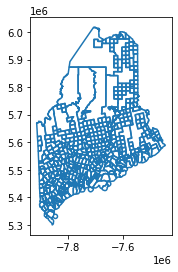

In [197]:
shapefiles_census.boundary.plot()

In [198]:
print(shapefiles_census.shape)
vest_shp.shape

(593, 24)


(573, 15)

<AxesSubplot:>

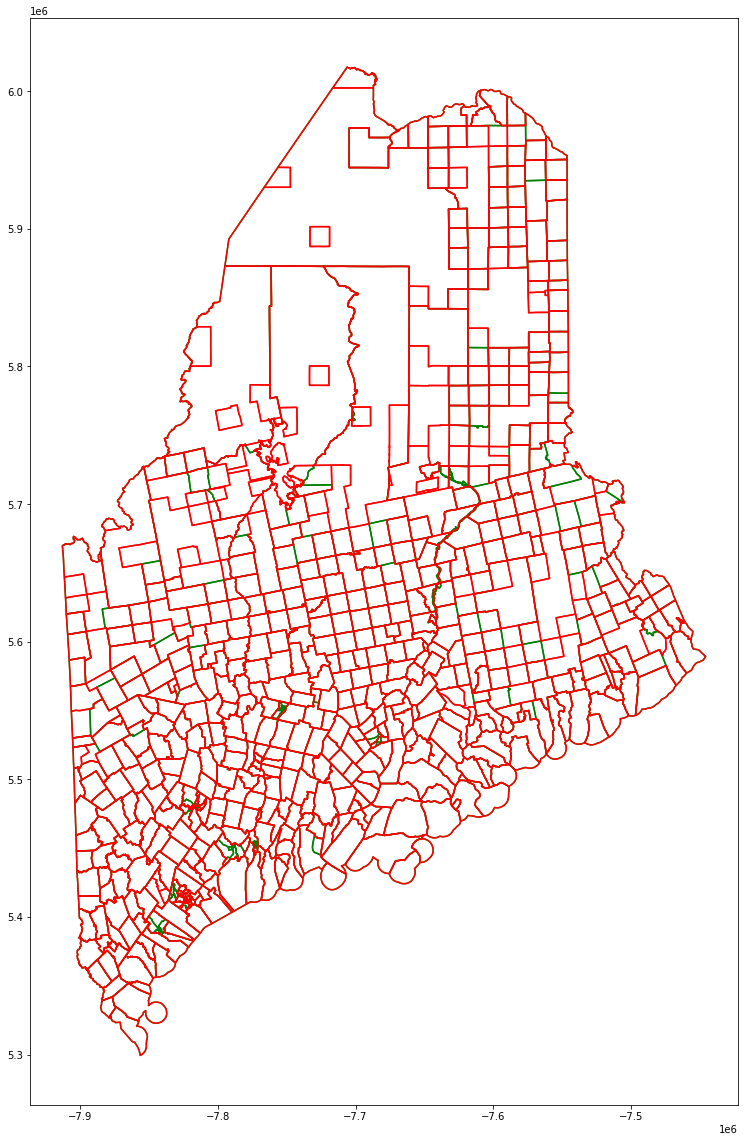

In [199]:
ax = shapefiles_census.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [200]:
shapefiles_census[shapefiles_census['NAMELSAD'].str.contains('Biddeford')]


,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,...,MTFCC,geometry,COUSUBFP,COUSUBNS,CLASSFP,EFF_DATE,AUTHTYPE,DOCU,FORM_ID,AREA
169,23,031,004860,Biddeford,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7855292.149 5387519.570 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
biddeford_shapefile = gp.read_file('./raw-from-source/Town_Info/Biddeford/2018_Ward/2018_Ward.shp')

In [202]:
biddeford_shapefile = biddeford_shapefile.to_crs(3857)

In [203]:
biddeford_shapefile['STATEFP'] = '23'
biddeford_shapefile['COUNTYFP'] = '031'
biddeford_shapefile.rename(columns={'Ward':'NAMELSAD'}, inplace=True)

In [204]:
biddeford_shapefile["NAMELSAD"].replace({'3':"Biddeford 3", '1':"Biddeford 1", '4':"Biddeford 4", '2':'Biddeford 2', '5':'Biddeford 5', '6':'Biddeford 6','7':'Biddeford 7'}, inplace=True)
biddeford_shapefile

,NAMELSAD,SHAPE_area,SHAPE_len,geometry,STATEFP,COUNTYFP
0,Biddeford 3,2.171580e+08,116037.876390,"MULTIPOLYGON (((-7840272.885 5383326.622, -784...",23,031
1,Biddeford 1,9.963425e+08,176902.747740,"POLYGON ((-7838003.728 5384639.934, -7837981.3...",23,031
2,Biddeford 4,1.864198e+07,40026.186315,"POLYGON ((-7843005.510 5386489.919, -7842989.4...",23,031
3,Biddeford 2,5.538994e+07,51690.234763,"POLYGON ((-7838003.728 5384639.934, -7838183.2...",23,031
4,Biddeford 5,1.440942e+07,33906.905158,"MULTIPOLYGON (((-7842344.315 5387331.629, -784...",23,031
5,Biddeford 6,2.118690e+08,121655.114619,"POLYGON ((-7843893.391 5388173.226, -7843924.3...",23,031
6,Biddeford 7,1.333307e+08,104525.940489,"POLYGON ((-7844230.598 5387106.815, -7844178.5...",23,031


In [205]:
biddeford_shapefile = biddeford_shapefile.drop(['SHAPE_area', 'SHAPE_len'], axis=1)

In [206]:
shapefiles_census = shapefiles_census.append(biddeford_shapefile, ignore_index = True)

In [207]:
shapefiles_census

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,...,MTFCC,geometry,COUSUBFP,COUSUBNS,CLASSFP,EFF_DATE,AUTHTYPE,DOCU,FORM_ID,AREA
0,23,001,019105,Durham,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7817369.025 5462128.237 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,001,020601,Auburn Ward 1,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7825981.165 5491825.668 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,001,020602,Auburn Ward 2,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7826218.825 5482213.694 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,001,020603,Auburn Ward 3,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7827567.458 5480409.100 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,001,020604,Auburn Ward 4,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7827393.683 5471255.509 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,23,031,NaN,Biddeford 4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((-7843005.510 5386489.919, -7842989.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,23,031,NaN,Biddeford 2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((-7838003.728 5384639.934, -7838183.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,23,031,NaN,Biddeford 5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"MULTIPOLYGON (((-7842344.315 5387331.629, -784...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,23,031,NaN,Biddeford 6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((-7843893.391 5388173.226, -7843924.3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
#Add a join column to the source shapefile
shapefiles_census["join_col"]=shapefiles_census['COUNTYFP']+shapefiles_census['NAMELSAD']
shapefiles_census['join_col'] = shapefiles_census['join_col'].str.upper()
election_results['join_col'] = election_results['join_col'].str.upper()

In [209]:
join_attempt_one = pd.merge(shapefiles_census,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

left_only     466
right_only    413
both          134
Name: _merge, dtype: int64


In [210]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP','NAME','County_FIPS','Precinct','join_col']].to_csv('./test2.csv')

In [211]:
election_shape_dict = {'003ALLAGASH TOWN': '003ALLAGASH',
 '003AMITY TOWN': '003AMITY',
 '003ASHLAND TOWN': '003ASHLAND/T12 R13/T9 R8',
 '003BLAINE TOWN': '003BLAINE',
 '003BRIDGEWATER TOWN': '003BRIDGEWATER',
 '003CARIBOU CITY': '003CARIBOU/CONNOR',
 '003CASTLE HILL TOWN': '003CASTLE HILL',
 '003CASWELL TOWN': '003CASWELL',
 '003CHAPMAN TOWN': '003CHAPMAN',
 '003CRYSTAL TOWN': '003CRYSTAL',
 '003CYR PLANTATION': '003CYR',
 '003DYER BROOK TOWN': '003DYER BROOK',
 '003EAGLE LAKE TOWN': '003EAGLE LAKE',
 '003EASTON TOWN': '003EASTON',
 '003FORT FAIRFIELD TOWN': '003FORT FAIRFIELD',
 '003FORT KENT TOWN': '003FORT KENT/BIG TWENTY/T15 R15',
 '003FRENCHVILLE TOWN': '003FRENCHVILLE',
 '003GARFIELD PLANTATION': '003GARFIELD',
 '003GLENWOOD PLANTATION': '003GLENWOOD',
 '003GRAND ISLE TOWN': '003GRAND ISLE',
 '003HAMLIN TOWN': '003HAMLIN',
 '003HAMMOND TOWN': '003HAMMOND',
 '003HAYNESVILLE TOWN': '003HAYNESVILLE',
 '003HERSEY TOWN': '003HERSEY',
 '003HODGDON TOWN': '003HODGDON/CARY',
 '003HOULTON TOWN': '003HOULTON',
 '003ISLAND FALLS TOWN': '003ISLAND FALLS',
 '003LIMESTONE TOWN': '003LIMESTONE',
 '003LINNEUS TOWN': '003LINNEUS',
 '003LITTLETON TOWN': '003LITTLETON',
 '003LUDLOW TOWN': '003LUDLOW',
 '003MACWAHOC PLANTATION': '003MACWAHOC',
 '003MADAWASKA TOWN': '003MADAWASKA',
 '003MAPLETON TOWN': '003MAPLETON',
 '003MARS HILL TOWN': '003MARS HILL',
 '003MASARDIS TOWN': '003MASARDIS',
 '003MERRILL TOWN': '003MERRILL',
 '003MONTICELLO TOWN': '003MONTICELLO',
 '003MORO PLANTATION': '003MORO/T7 R5',
 '003NASHVILLE PLANTATION': '003NASHVILLE',
 '003NEW CANADA TOWN': '003NEW CANADA',
 '003NEW LIMERICK TOWN': '003NEW LIMERICK',
 '003NEW SWEDEN TOWN': '003NEW SWEDEN',
 '003OAKFIELD TOWN': '003OAKFIELD',
 '003ORIENT TOWN': '003ORIENT',
 '003PERHAM TOWN': '003PERHAM',
 '003PORTAGE LAKE TOWN': '003PORTAGE LAKE',
 '003PRESQUE ISLE CITY': '003PRESQUE ISLE',
 '003REED PLANTATION': '003REED/UPPER MOLUNKUS',
 '003SHERMAN TOWN': '003SHERMAN/BENEDICTA/SILVER RIDGE',
 '003SMYRNA TOWN': '003SMYRNA',
 '003ST. AGATHA TOWN': '003ST. AGATHA/SINCLAIR',
 '003ST. FRANCIS TOWN': '003ST. FRANCIS',
 '003ST. JOHN PLANTATION': '003ST. JOHN',
 '003STOCKHOLM TOWN': '003STOCKHOLM',
 '003VAN BUREN TOWN': '003VAN BUREN/VAN BUREN COVE',
 '003WADE TOWN': '003WADE',
 '003WALLAGRASS TOWN': '003WALLAGRASS',
 '003WASHBURN TOWN': '003WASHBURN',
 '003WESTFIELD TOWN': '003WESTFIELD',
 '003WESTMANLAND TOWN': '003WESTMANLAND',
 '003WESTON TOWN': '003WESTON/BANCROFT',
 '003WINTERVILLE PLANTATION': '003WINTERVILLE',
 '003WOODLAND TOWN': '003WOODLAND',
 '005PORTLAND PRECINCT 1-1': '005PORTLAND 1-1',
 '005PORTLAND PRECINCT 1-2': '005PORTLAND 1-2',
 '005PORTLAND PRECINCT 1-3': '005PORTLAND 1-3',
 '005PORTLAND PRECINCT 2-1': '005PORTLAND 2-1',
 '005PORTLAND PRECINCT 2-2': '005PORTLAND 2-2',
 '005PORTLAND PRECINCT 3-1': '005PORTLAND 3-1',
 '005PORTLAND PRECINCT 3-2': '005PORTLAND 3-2',
 '005PORTLAND PRECINCT 4-1': '005PORTLAND 4-1',
 '005PORTLAND PRECINCT 4-2': '005PORTLAND 4-2',
 '005PORTLAND PRECINCT 5-1': '005PORTLAND 5-1',
 '005PORTLAND PRECINCT 5-2': '005PORTLAND 5-2',
 '007AVON TOWN': '007AVON',
 '007CARRABASSETT VALLEY TOWN': '007CARRABASSETT VALLEY',
 '007CARTHAGE TOWN': '007CARTHAGE',
 '007CHESTERVILLE TOWN': '007CHESTERVILLE',
 '007COPLIN PLANTATION': '007COPLIN',
 '007DALLAS PLANTATION': '007DALLAS',
 '007EUSTIS TOWN': '007EUSTIS/ALDER STREAM/COBURN GORE/JIM POND',
 '007FARMINGTON TOWN': '007FARMINGTON',
 '007INDUSTRY TOWN': '007INDUSTRY',
 '007JAY TOWN': '007JAY',
 '007KINGFIELD TOWN': '007KINGFIELD/SALEM',
 '007NEW SHARON TOWN': '007NEW SHARON',
 '007NEW VINEYARD TOWN': '007NEW VINEYARD',
 '007PHILLIPS TOWN': '007PHILLIPS/MADRID',
 '007RANGELEY TOWN': '007RANGELEY/ADAMSTOWN/LOWER CUPSUPTIC',
 '007RANGELEY PLANTATION': '007RANGELEY PLT',
 '007SANDY RIVER PLANTATION': '007SANDY RIVER',
 '007STRONG TOWN': '007STRONG/FREEMAN',
 '007TEMPLE TOWN': '007TEMPLE',
 '007WELD TOWN': '007WELD',
 '007WILTON TOWN': '007WILTON/WASHINGTON',
 '007WYMAN UT': '007WYMAN',
 '009AMHERST TOWN': '009AMHERST',
 '009AURORA TOWN': '009AURORA/T28 MD',
 '009BAR HARBOR TOWN': '009BAR HARBOR',
 '009BLUE HILL TOWN': '009BLUE HILL',
 '009BROOKLIN TOWN': '009BROOKLIN',
 '009BROOKSVILLE TOWN': '009BROOKSVILLE',
 '009BUCKSPORT TOWN': '009BUCKSPORT',
 '009CASTINE TOWN': '009CASTINE',
 '009CRANBERRY ISLES TOWN': '009CRANBERRY ISLES',
 '009DEDHAM TOWN': '009DEDHAM',
 '009DEER ISLE TOWN': '009DEER ISLE',
 '009EASTBROOK TOWN': '009EASTBROOK',
 '009FRANKLIN TOWN': '009FRANKLIN/T9 SD/T10 SD',
 '009FRENCHBORO TOWN': '009FRENCHBORO',
 '009GOULDSBORO TOWN': '009GOULDSBORO',
 '009GREAT POND TOWN': '009GREAT POND/T32 MD',
 '009HANCOCK TOWN': '009HANCOCK',
 '009LAMOINE TOWN': '009LAMOINE',
 '009MARIAVILLE TOWN': '009MARIAVILLE',
 '009MOUNT DESERT TOWN': '009MOUNT DESERT',
 '009ORLAND TOWN': '009ORLAND',
 '009OSBORN TOWN': '009OSBORN',
 '009OTIS TOWN': '009OTIS',
 '009PENOBSCOT TOWN': '009PENOBSCOT',
 '009SEDGWICK TOWN': '009SEDGWICK',
 '009SORRENTO TOWN': '009SORRENTO',
 '009SOUTHWEST HARBOR TOWN': '009SOUTHWEST HARBOR',
 '009STONINGTON TOWN': '009STONINGTON',
 '009SULLIVAN TOWN': '009SULLIVAN',
 '009SURRY TOWN': '009SURRY',
 '009SWANS ISLAND TOWN': '009SWANS ISLAND',
 '009TREMONT TOWN': '009TREMONT',
 '009TRENTON TOWN': '009TRENTON',
 '009VERONA ISLAND TOWN': '009VERONA ISLAND',
 '009WALTHAM TOWN': '009WALTHAM',
 '009WINTER HARBOR TOWN': '009WINTER HARBOR',
 '013APPLETON TOWN': '013APPLETON',
 '013CAMDEN TOWN': '013CAMDEN',
 '013CUSHING TOWN': '013CUSHING',
 '013FRIENDSHIP TOWN': '013FRIENDSHIP',
 '013HOPE TOWN': '013HOPE',
 '013ISLE AU HAUT TOWN': '013ISLE AU HAUT',
 '013MATINICUS ISLE PLANTATION': '013MATINICUS ISLE',
 '013NORTH HAVEN TOWN': '013NORTH HAVEN',
 '013OWLS HEAD TOWN': '013OWLS HEAD',
 '013ROCKLAND CITY': '013ROCKLAND',
 '013ROCKPORT TOWN': '013ROCKPORT',
 '013SOUTH THOMASTON TOWN': '013SOUTH THOMASTON',
 '013ST. GEORGE TOWN': '013ST. GEORGE',
 '013THOMASTON TOWN': '013THOMASTON',
 '013UNION TOWN': '013UNION',
 '013VINALHAVEN TOWN': '013VINALHAVEN',
 '013WARREN TOWN': '013WARREN',
 '013WASHINGTON TOWN': '013WASHINGTON',
 '015ALNA TOWN': '015ALNA',
 '015BOOTHBAY TOWN': '015BOOTHBAY',
 '015BOOTHBAY HARBOR TOWN': '015BOOTHBAY HARBOR',
 '015BREMEN TOWN': '015BREMEN',
 '015BRISTOL TOWN': '015BRISTOL/LOUDS ISLAND',
 '015DAMARISCOTTA TOWN': '015DAMARISCOTTA',
 '015DRESDEN TOWN': '015DRESDEN',
 '015EDGECOMB TOWN': '015EDGECOMB',
 '015JEFFERSON TOWN': '015JEFFERSON',
 '015MONHEGAN PLANTATION': '015MONHEGAN',
 '015NEWCASTLE TOWN': '015NEWCASTLE',
 '015NOBLEBORO TOWN': '015NOBLEBORO',
 '015SOMERVILLE TOWN': '015SOMERVILLE',
 '015SOUTH BRISTOL TOWN': '015SOUTH BRISTOL',
 '015SOUTHPORT TOWN': '015SOUTHPORT',
 '015WALDOBORO TOWN': '015WALDOBORO',
 '015WESTPORT ISLAND TOWN': '015WESTPORT ISLAND',
 '015WHITEFIELD TOWN': '015WHITEFIELD',
 '015WISCASSET TOWN': '015WISCASSET',
 '017ANDOVER TOWN': '017ANDOVER/ANDOVER NORTH SURPLUS',
 '017BETHEL TOWN': '017BETHEL/MASON',
 '017BROWNFIELD TOWN': '017BROWNFIELD',
 '017BUCKFIELD TOWN': '017BUCKFIELD',
 '017BYRON TOWN': '017BYRON',
 '017CANTON TOWN': '017CANTON',
 '017DENMARK TOWN': '017DENMARK',
 '017DIXFIELD TOWN': '017DIXFIELD',
 '017FRYEBURG TOWN': '017FRYEBURG',
 '017GILEAD TOWN': '017GILEAD',
 '017GREENWOOD TOWN': '017GREENWOOD',
 '017HANOVER TOWN': '017HANOVER',
 '017HARTFORD TOWN': '017HARTFORD',
 '017HEBRON TOWN': '017HEBRON',
 '017HIRAM TOWN': '017HIRAM',
 '017LINCOLN PLANTATION': '017LINCOLN/LYNCHTOWN',
 '017LOVELL TOWN': '017LOVELL',
 '017MAGALLOWAY PLANTATION': '017MAGALLOWAY',
 '017MEXICO TOWN': '017MEXICO',
 '017NEWRY TOWN': '017NEWRY/RILEY',
 '017NORWAY TOWN': '017NORWAY',
 '017OTISFIELD TOWN': '017OTISFIELD',
 '017OXFORD TOWN': '017OXFORD',
 '017PARIS TOWN': '017PARIS',
 '017PERU TOWN': '017PERU',
 '017PORTER TOWN': '017PORTER',
 '017ROXBURY TOWN': '017ROXBURY',
 '017RUMFORD TOWN': '017RUMFORD',
 '017STONEHAM TOWN': '017STONEHAM',
 '017STOW TOWN': '017STOW',
 '017SUMNER TOWN': '017SUMNER',
 '017SWEDEN TOWN': '017SWEDEN',
 '017UPTON TOWN': '017UPTON',
 '017WATERFORD TOWN': '017WATERFORD',
 '017WEST PARIS TOWN': '017WEST PARIS',
 '017WOODSTOCK TOWN': '017WOODSTOCK/MILTON',
 '019ALTON TOWN': '019ALTON',
 '019ARGYLE UT': '019ARGYLE',
 '019BANGOR CITY': '019BANGOR',
 '019BRADFORD TOWN': '019BRADFORD',
 '019BRADLEY TOWN': '019BRADLEY',
 '019BREWER CITY': '019BREWER',
 '019BURLINGTON TOWN': '019BURLINGTON',
 '019CARMEL TOWN': '019CARMEL',
 '019CARROLL PLANTATION': '019CARROLL',
 '019CHARLESTON TOWN': '019CHARLESTON',
 '019CHESTER TOWN': '019CHESTER',
 '019CLIFTON TOWN': '019CLIFTON',
 '019CORINNA TOWN': '019CORINNA',
 '019CORINTH TOWN': '019CORINTH',
 '019DEXTER TOWN': '019DEXTER',
 '019DIXMONT TOWN': '019DIXMONT',
 '019DREW PLANTATION': '019DREW',
 '019EAST MILLINOCKET TOWN': '019EAST MILLINOCKET/DOLBY',
 '019EDDINGTON TOWN': '019EDDINGTON',
 '019EDINBURG TOWN': '019EDINBURG',
 '019ENFIELD TOWN': '019ENFIELD',
 '019ETNA TOWN': '019ETNA',
 '019EXETER TOWN': '019EXETER',
 '019GARLAND TOWN': '019GARLAND',
 '019GLENBURN TOWN': '019GLENBURN',
 '019GREENBUSH TOWN': '019GREENBUSH',
 '019HAMPDEN TOWN': '019HAMPDEN',
 '019HERMON TOWN': '019HERMON',
 '019HOLDEN TOWN': '019HOLDEN',
 '019HOWLAND TOWN': '019HOWLAND',
 '019HUDSON TOWN': '019HUDSON',
 '019KENDUSKEAG TOWN': '019KENDUSKEAG',
 '019KINGMAN UT': '019KINGMAN',
 '019LAGRANGE TOWN': '019LAGRANGE',
 '019LAKEVILLE TOWN': '019LAKEVILLE',
 '019LEE TOWN': '019LEE',
 '019LEVANT TOWN': '019LEVANT',
 '019LINCOLN TOWN': '019LINCOLN',
 '019LOWELL TOWN': '019LOWELL',
 '019MATTAWAMKEAG TOWN': '019MATTAWAMKEAG/MOLUNKUS',
 '019MAXFIELD TOWN': '019MAXFIELD',
 '019MEDWAY TOWN': '019MEDWAY/GRINDSTONE/SOLDIERTOWN',
 '019MILFORD TOWN': '019MILFORD/GREENFIELD',
 '019MILLINOCKET TOWN': '019MILLINOCKET',
 '019MOUNT CHASE TOWN': '019MOUNT CHASE',
 '019NEWBURGH TOWN': '019NEWBURGH',
 '019NEWPORT TOWN': '019NEWPORT',
 '019OLD TOWN CITY': '019OLD TOWN',
 '019ORONO TOWN': '019ORONO',
 '019ORRINGTON TOWN': '019ORRINGTON',
 '019PASSADUMKEAG TOWN': '019PASSADUMKEAG',
 '019PATTEN TOWN': '019PATTEN',
 '019PENOBSCOT INDIAN ISLAND RESERVATION': '019PENOBSCOT INDIAN ISLAND',
 '019PLYMOUTH TOWN': '019PLYMOUTH',
 '019PRENTISS UT': '019PRENTISS',
 '019SEBOEIS PLANTATION': '019SEBOEIS',
 '019SPRINGFIELD TOWN': '019SPRINGFIELD',
 '019STACYVILLE TOWN': '019STACYVILLE',
 '019STETSON TOWN': '019STETSON',
 '019VEAZIE TOWN': '019VEAZIE',
 '019WEBSTER PLANTATION': '019WEBSTER',
 '019WINN TOWN': '019WINN',
 '019WOODVILLE TOWN': '019WOODVILLE',
 '021ABBOT TOWN': '021ABBOT',
 '021ATKINSON TOWN': '021ATKINSON',
 '021BEAVER COVE TOWN': '021BEAVER COVE/FRENCHTOWN/LILY BAY',
 '021BOWERBANK TOWN': '021BOWERBANK',
 '021BROWNVILLE TOWN': '021BROWNVILLE/BARNARD/EBEEMEE/WILLIAMSBURG/T4 R9',
 '021DOVER-FOXCROFT TOWN': '021DOVER-FOXCROFT',
 '021GREENVILLE TOWN': '021GREENVILLE/UNORGANIZED TWPS',
 '021GUILFORD TOWN': '021GUILFORD/KINGSBURY',
 '021LAKE VIEW PLANTATION': '021LAKE VIEW',
 '021MEDFORD TOWN': '021MEDFORD',
 '021MILO TOWN': '021MILO/ORNEVILLE',
 '021MONSON TOWN': '021MONSON/BLANCHARD/ELLIOTTSVILLE',
 '021PARKMAN TOWN': '021PARKMAN',
 '021SANGERVILLE TOWN': '021SANGERVILLE',
 '021SEBEC TOWN': '021SEBEC',
 '021SHIRLEY TOWN': '021SHIRLEY',
 '021WELLINGTON TOWN': '021WELLINGTON',
 '021WILLIMANTIC TOWN': '021WILLIMANTIC',
 '025ANSON TOWN': '025ANSON',
 '025ATHENS TOWN': '025ATHENS',
 '025BINGHAM TOWN': '025BINGHAM',
 '025BRIGHTON PLANTATION': '025BRIGHTON',
 '025CAMBRIDGE TOWN': '025CAMBRIDGE',
 '025CANAAN TOWN': '025CANAAN',
 '025CARATUNK TOWN': '025CARATUNK',
 '025CORNVILLE TOWN': '025CORNVILLE',
 '025DENNISTOWN PLANTATION': '025DENNISTOWN',
 '025DETROIT TOWN': '025DETROIT',
 '025EMBDEN TOWN': '025EMBDEN',
 '025FAIRFIELD TOWN': '025FAIRFIELD',
 '025HARMONY TOWN': '025HARMONY',
 '025HARTLAND TOWN': '025HARTLAND',
 '025HIGHLAND PLANTATION': '025HIGHLAND PLT/CARRYING PLACE/DEAD RIVER',
 '025JACKMAN TOWN': '025JACKMAN/UNORGANIZED TWPS',
 '025MADISON TOWN': '025MADISON',
 '025MERCER TOWN': '025MERCER',
 '025MOOSE RIVER TOWN': '025MOOSE RIVER',
 '025MOSCOW TOWN': '025MOSCOW/BOWTOWN',
 '025NEW PORTLAND TOWN': '025NEW PORTLAND',
 '025NORRIDGEWOCK TOWN': '025NORRIDGEWOCK',
 '025PALMYRA TOWN': '025PALMYRA',
 '025PITTSFIELD TOWN': '025PITTSFIELD',
 '025PLEASANT RIDGE PLANTATION': '025PLEASANT RIDGE',
 '025RIPLEY TOWN': '025RIPLEY',
 '025SKOWHEGAN TOWN': '025SKOWHEGAN',
 '025SMITHFIELD TOWN': '025SMITHFIELD',
 '025SOLON TOWN': '025SOLON/CONCORD',
 '025ST. ALBANS TOWN': '025ST. ALBANS',
 '025STARKS TOWN': '025STARKS',
 '025THE FORKS PLANTATION': '025THE FORKS/INDIAN STREAM/MOXIE GORE',
 '025WEST FORKS PLANTATION': '025WEST FORKS',
 '029ADDISON TOWN': '029ADDISON',
 '029ALEXANDER TOWN': '029ALEXANDER',
 '029BAILEYVILLE TOWN': '029BAILEYVILLE',
 '029BARING PLANTATION': '029BARING',
 '029BEALS TOWN': '029BEALS',
 '029BEDDINGTON TOWN': '029BEDDINGTON/DEVEREAUX/T24 MD',
 '029CALAIS CITY': '029CALAIS',
 '029CHARLOTTE TOWN': '029CHARLOTTE',
 '029CHERRYFIELD TOWN': '029CHERRYFIELD',
 '029COLUMBIA TOWN': '029COLUMBIA',
 '029COLUMBIA FALLS TOWN': '029COLUMBIA FALLS',
 '029COOPER TOWN': '029COOPER',
 '029CRAWFORD TOWN': '029CRAWFORD',
 '029CUTLER TOWN': '029CUTLER',
 '029DANFORTH TOWN': '029DANFORTH/BROOKTON/FOREST',
 '029DEBLOIS TOWN': '029DEBLOIS',
 '029DENNYSVILLE TOWN': '029DENNYSVILLE/EDMUNDS',
 '029EAST MACHIAS TOWN': '029EAST MACHIAS',
 '029EASTPORT CITY': '029EASTPORT',
 '029GRAND LAKE STREAM PLANTATION': '029GRAND LAKE STREAM/GREENLAW CHOPPING',
 '029HARRINGTON TOWN': '029HARRINGTON',
 '029JONESBORO TOWN': '029JONESBORO',
 '029JONESPORT TOWN': '029JONESPORT',
 '029LUBEC TOWN': '029LUBEC',
 '029MACHIAS TOWN': '029MACHIAS',
 '029MACHIASPORT TOWN': '029MACHIASPORT',
 '029MARSHFIELD TOWN': '029MARSHFIELD',
 '029MEDDYBEMPS TOWN': '029MEDDYBEMPS',
 '029MILBRIDGE TOWN': '029MILBRIDGE',
 '029NORTHFIELD TOWN': '029NORTHFIELD',
 '029PEMBROKE TOWN': '029PEMBROKE',
 '029PERRY TOWN': '029PERRY',
 '029PRINCETON TOWN': '029PRINCETON/BIG LAKE',
 '029ROBBINSTON TOWN': '029ROBBINSTON',
 '029ROQUE BLUFFS TOWN': '029ROQUE BLUFFS',
 '029STEUBEN TOWN': '029STEUBEN/T7 SD',
 '029TALMADGE TOWN': '029TALMADGE',
 '029TOPSFIELD TOWN': '029TOPSFIELD/CODYVILLE/KOSSUTH',
 '029VANCEBORO TOWN': '029VANCEBORO/LAMBERT LAKE',
 '029WAITE TOWN': '029WAITE',
 '029WESLEY TOWN': '029WESLEY/DAY BLOCK',
 '029WHITING TOWN': '029WHITING/TRESCOTT',
 '029WHITNEYVILLE TOWN': '029WHITNEYVILLE'}

shapefiles_census["join_col"]=shapefiles_census["join_col"].map(election_shape_dict).fillna(shapefiles_census["join_col"])

In [212]:
join_attempt_two = pd.merge(shapefiles_census,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          497
left_only     103
right_only     50
Name: _merge, dtype: int64


In [213]:
join_attempt_two[join_attempt_two['_merge'] != 'both'][['COUNTYFP','NAME','County_FIPS','Precinct','join_col']]

,COUNTYFP,NAME,County_FIPS,Precinct,join_col
1,001,Auburn Ward 1,NaN,NaN,001AUBURN WARD 1
2,001,Auburn Ward 2,NaN,NaN,001AUBURN WARD 2
3,001,Auburn Ward 3,NaN,NaN,001AUBURN WARD 3
4,001,Auburn Ward 4,NaN,NaN,001AUBURN WARD 4
14,001,Lewiston Ward 5,NaN,NaN,001LEWISTON WARD 5
...,...,...,...,...,...
645,NaN,NaN,001,Lewiston Ward 5/7,001LEWISTON WARD 5/7
646,NaN,NaN,005,South Portland Ward 1,005SOUTH PORTLAND WARD 1
647,NaN,NaN,005,South Portland Ward 2,005SOUTH PORTLAND WARD 2
648,NaN,NaN,005,South Portland Ward 3/4,005SOUTH PORTLAND WARD 3/4


In [214]:
shapefiles_census_comp=join_attempt_two
del shapefiles_census_comp['_merge']
shapefiles_census_comp = gp.GeoDataFrame(shapefiles_census_comp,crs=3857)

In [215]:
join_attempt_shape1 = pd.merge(shapefiles_census_comp,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_shape1["_merge"].value_counts())
join_attempt_shape1.columns

both          549
left_only     101
right_only     24
Name: _merge, dtype: int64


Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAMELSAD', 'VTDI', 'LSAD', 'CHNG_TYPE',
       'ORIG_NAME', 'ORIG_CODE', 'RELATE', 'NAME', 'VINTAGE', 'FUNCSTAT',
       'JUSTIFY', 'MTFCC', 'geometry_x', 'COUSUBFP', 'COUSUBNS', 'CLASSFP',
       'EFF_DATE', 'AUTHTYPE', 'DOCU', 'FORM_ID', 'AREA', 'join_col', 'County',
       'Precinct', 'County_FIPS_x', 'G20PREDBID_x', 'G20PRERTRU_x',
       'G20PRELJOR_x', 'G20PREGHAW_x', 'G20PREAFUE_x', 'G20USSDGID_x',
       'G20USSRCOL_x', 'G20USSISAV_x', 'G20USSILIN_x', 'STATEFP20', 'COUNTY20',
       'NAME20', 'G20PREDBID_y', 'G20PRERTRU_y', 'G20PRELJOR_y',
       'G20PREGHAW_y', 'G20PREAFUE_y', 'G20USSDGID_y', 'G20USSRCOL_y',
       'G20USSISAV_y', 'G20USSILIN_y', 'geometry_y', 'County_FIPS_y',
       '_merge'],
      dtype='object')

In [216]:
print(vest_shp[vest_shp['join_col'].str.contains('WESTBROOK')])

    STATEFP20    COUNTY20     NAME20  G20PREDBID  G20PRERTRU  G20PRELJOR  \
548        23  CUMBERLAND  Westbrook        7352        3599         183   

     G20PREGHAW  G20PREAFUE  G20USSDGID  G20USSRCOL  G20USSISAV  G20USSILIN  \
548         125          16        5973        4392         721         172   

                                              geometry County_FIPS  \
548  POLYGON ((-7829133.542 5418024.491, -7829174.0...         005   

         join_col  
548  005WESTBROOK  


In [217]:
print(shapefiles_census_comp[shapefiles_census_comp['join_col'].str.contains('WESTBROOK')])

    STATEFP COUNTYFP   VTDST          NAMELSAD VTDI LSAD CHNG_TYPE ORIG_NAME  \
71       23      005  821051  Westbrook Ward 1    A   00      None      None   
72       23      005  821054  Westbrook Ward 4    A   00      None      None   
73       23      005  821055  Westbrook Ward 5    A   00      None      None   
74       23      005  821052  Westbrook Ward 2    A   00      None      None   
75       23      005  821053  Westbrook Ward 3    A   00      None      None   
609     NaN      NaN     NaN               NaN  NaN  NaN       NaN       NaN   

    ORIG_CODE RELATE  ... County_FIPS G20PREDBID G20PRERTRU G20PRELJOR  \
71       None   None  ...         NaN        NaN        NaN        NaN   
72       None   None  ...         NaN        NaN        NaN        NaN   
73       None   None  ...         NaN        NaN        NaN        NaN   
74       None   None  ...         NaN        NaN        NaN        NaN   
75       None   None  ...         NaN        NaN        NaN        Na

<AxesSubplot:>

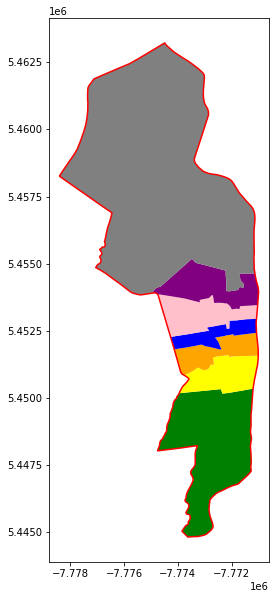

In [218]:
ax = vest_shp[vest_shp['join_col'] == '023BATH'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 2'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 3'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 4'].plot(figsize=(10,10),ax=ax,color="blue")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 5'].plot(figsize=(10,10),ax=ax,color="pink")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 6'].plot(figsize=(10,10),ax=ax,color="purple")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 7'].plot(figsize=(10,10),ax=ax,color="gray")

In [219]:
#Merge Bath precincts according to VEST document
#VEST-VTDs were merged for Bath, Brunswick, Saco, Waterville, Westbrook as statewide votes were not reported by ward.
prec2combine = [shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 1'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 2'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 3'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 4'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 5'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 6'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 7']]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="023BATH WARD 1","join_col"]='023BATH'
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="023BATH","geometry"]=new_fort.unary_union
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 2"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 3"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 4"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 5"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 6"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 7"]

<ipython-input-219-a212717310c3>:4: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)


<AxesSubplot:>

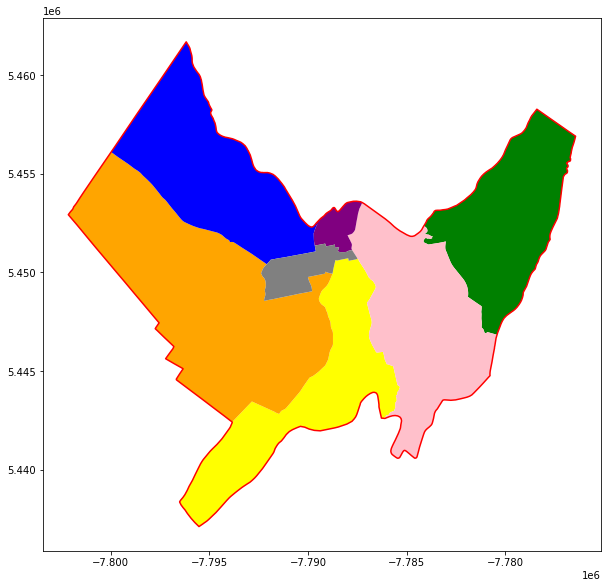

In [220]:
ax = vest_shp[vest_shp['join_col'] == '005BRUNSWICK'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 2'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 3'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 4'].plot(figsize=(10,10),ax=ax,color="blue")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 5'].plot(figsize=(10,10),ax=ax,color="pink")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 6'].plot(figsize=(10,10),ax=ax,color="purple")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 7'].plot(figsize=(10,10),ax=ax,color="gray")

In [221]:
#Merge Brunswick precincts according to VEST document
#VEST-VTDs were merged for Bath, Brunswick, Saco, Waterville, Westbrook as statewide votes were not reported by ward.
prec2combine = [shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 1'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 2'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 3'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 4'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 5'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 6'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 7']]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="005BRUNSWICK VOTING DISTRICT 1","join_col"]='005BRUNSWICK'
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="005BRUNSWICK","geometry"]=new_fort.unary_union
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 2"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 3"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 4"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 5"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 6"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 7"]

<ipython-input-221-1a5ef330b48a>:4: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)


<AxesSubplot:>

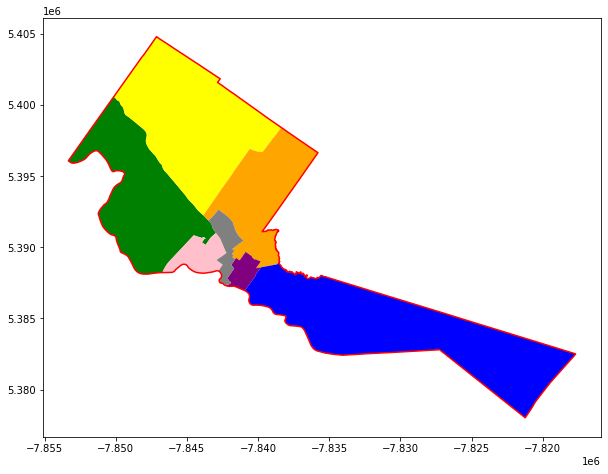

In [222]:
ax = vest_shp[vest_shp['join_col'] == '031SACO'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '031SACO WARD 1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '031SACO WARD 2'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '031SACO WARD 3'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '031SACO WARD 4'].plot(figsize=(10,10),ax=ax,color="blue")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '031SACO WARD 5'].plot(figsize=(10,10),ax=ax,color="pink")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '031SACO WARD 6'].plot(figsize=(10,10),ax=ax,color="purple")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '031SACO WARD 7'].plot(figsize=(10,10),ax=ax,color="gray")

In [223]:
#Merge Saco precincts according to VEST document
#VEST-VTDs were merged for Bath, Brunswick, Saco, Waterville, Westbrook as statewide votes were not reported by ward.
prec2combine = [shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '031SACO WARD 1'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '031SACO WARD 2'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '031SACO WARD 3'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '031SACO WARD 4'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '031SACO WARD 5'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '031SACO WARD 6'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '031SACO WARD 7']]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="031SACO WARD 1","join_col"]='031SACO'
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="031SACO","geometry"]=new_fort.unary_union
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="031SACO WARD 2"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="031SACO WARD 3"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="031SACO WARD 4"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="031SACO WARD 5"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="031SACO WARD 6"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="031SACO WARD 7"]

<ipython-input-223-5a1f3f9c88a9>:4: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)


<AxesSubplot:>

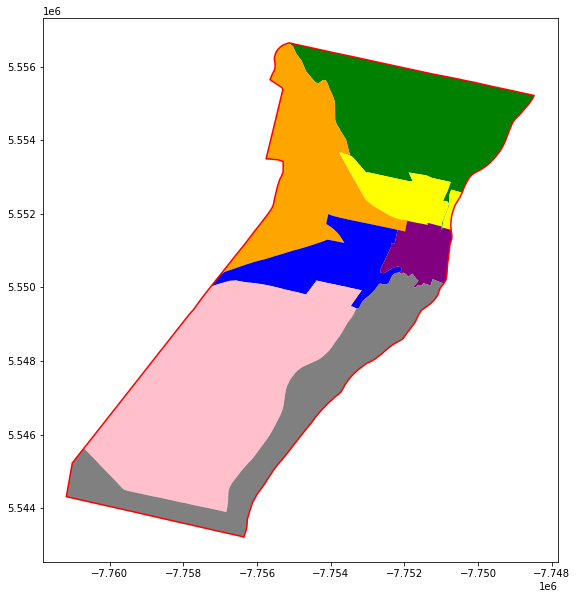

In [224]:
ax = vest_shp[vest_shp['join_col'] == '011WATERVILLE'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 2'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 3'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 4'].plot(figsize=(10,10),ax=ax,color="blue")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 5'].plot(figsize=(10,10),ax=ax,color="pink")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 6'].plot(figsize=(10,10),ax=ax,color="purple")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 7'].plot(figsize=(10,10),ax=ax,color="gray")

In [225]:
#Merge Waterville precincts according to VEST document
#VEST-VTDs were merged for Bath, Brunswick, Saco, Waterville, Westbrook as statewide votes were not reported by ward.
prec2combine = [shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 1'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 2'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 3'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 4'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 5'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 6'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 7']]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="011WATERVILLE WARD 1","join_col"]='011WATERVILLE'
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="011WATERVILLE","geometry"]=new_fort.unary_union
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 2"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 3"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 4"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 5"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 6"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 7"]

<ipython-input-225-1feabb74b6d3>:4: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)


<AxesSubplot:>

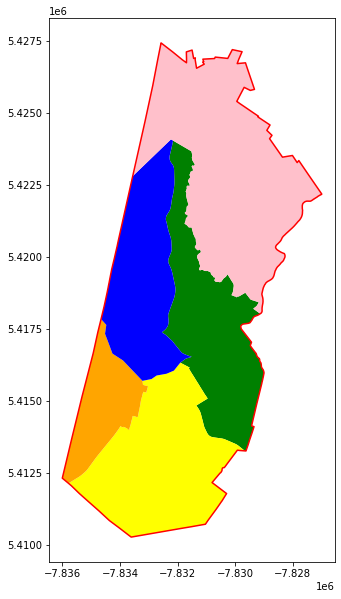

In [226]:
ax = vest_shp[vest_shp['join_col'] == '005WESTBROOK'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 2'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 3'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 4'].plot(figsize=(10,10),ax=ax,color="blue")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 5'].plot(figsize=(10,10),ax=ax,color="pink")

In [227]:
#Merge Waterville precincts according to VEST document
#VEST-VTDs were merged for Bath, Brunswick, Saco, Waterville, Westbrook as statewide votes were not reported by ward.
prec2combine = [shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 1'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 2'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 3'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 4'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005WESTBROOK WARD 5']]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="005WESTBROOK WARD 1","join_col"]='005WESTBROOK'
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="005WESTBROOK","geometry"]=new_fort.unary_union
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005WESTBROOK WARD 2"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005WESTBROOK WARD 3"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005WESTBROOK WARD 4"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005WESTBROOK WARD 5"]

<ipython-input-227-90aa9999dd5f>:4: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)


In [228]:
final_merge = pd.merge(shapefiles_census_comp,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

both          554
left_only      68
right_only     24
Name: final_merge, dtype: int64

In [229]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     353
False    201
dtype: int64


1) For 003-Ashland town difference in area is 40.44290438704052
2) For 003-Caribou city difference in area is 21.94590484685952
3) For 003-Fort Kent town difference in area is 53.10701727359202
4) For 003-Hodgdon town difference in area is 10.06191995040225
5) For 003-Moro plantation difference in area is 20.79648326502876
6) For 003-Reed plantation difference in area is 9.710330523982027
7) For 003-St. Agatha town difference in area is 20.408672251176597
8) For 003-Sherman town difference in area is 21.003460456886156
9) For 003-Van Buren town difference in area is 19.57554271217064
10) For 003-Weston town difference in area is 21.762137636480205
11) For 007-Eustis town difference in area is 47.050887099966424
12) For 007-Kingfield town difference in area is 12.026792627351258
13) For 007-Phillips town difference in area is 21.5515656550383
14) For 007-Rangeley town difference in area is 37.43406237837343
15) For 007-Strong town difference in area is 17.555412521618955
16) For 007-Wil

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\geopandas\plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


23) For 017-Lincoln plantation difference in area is 22.249285970496402
24) For 017-Newry town difference in area is 25.826957698078452
25) For 017-Woodstock town difference in area is 7.5772955778569875
26) For 019-Argyle UT difference in area is 1.1158900827494462
27) For 019-Chester town difference in area is 0.83265934899399
28) For 019-East Millinocket town difference in area is 10.97679321727712
29) For 019-Edinburg town difference in area is 0.6707287794988769
30) For 019-Greenbush town difference in area is 1.610134039399951
31) For 019-Lincoln town difference in area is 0.7770219798995571
32) For 019-Mattawamkeag town difference in area is 20.87405717487853
33) For 019-Medway town difference in area is 43.86513610919688
34) For 019-Milford town difference in area is 19.777509152260045
35) For 019-Penobscot Indian Island Reservation difference in area is 9.437954155454417
36) For 021-Beaver Cove town difference in area is 38.337678778125515
37) For 021-Brownville town differenc

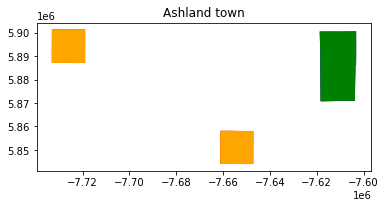

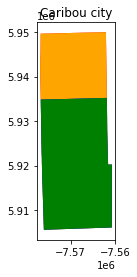

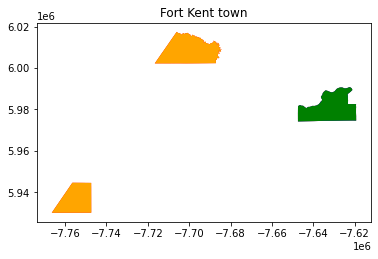

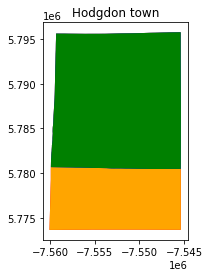

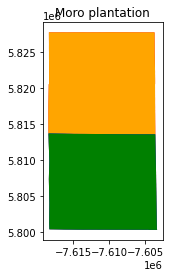

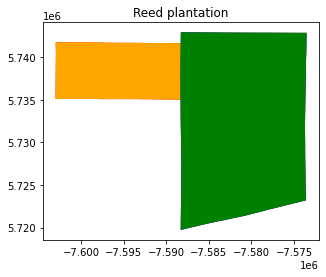

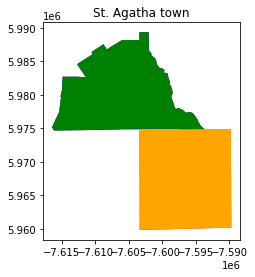

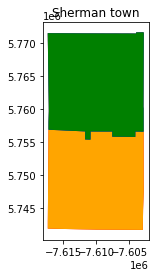

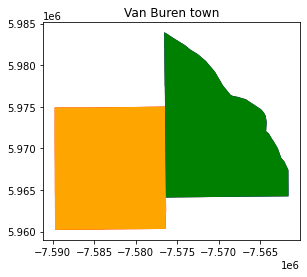

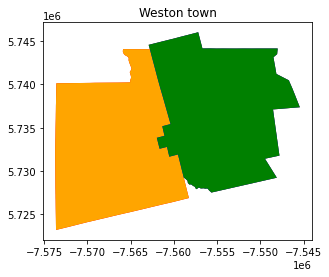

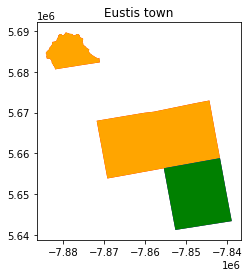

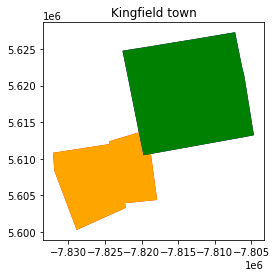

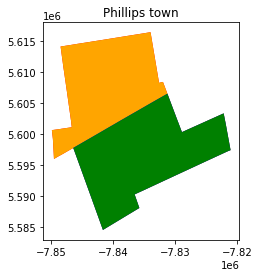

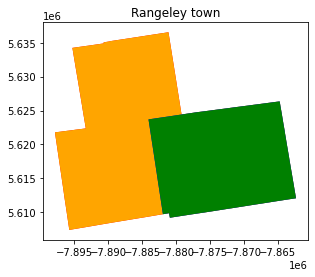

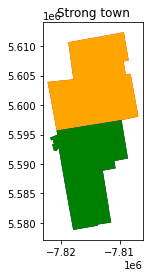

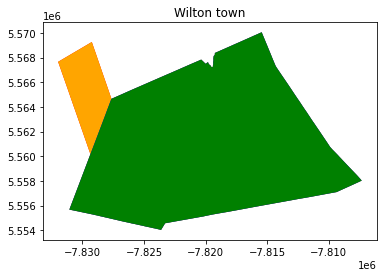

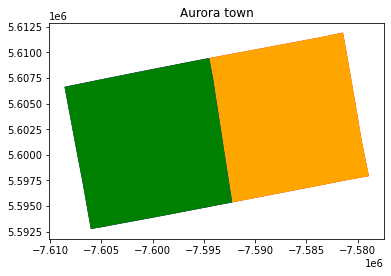

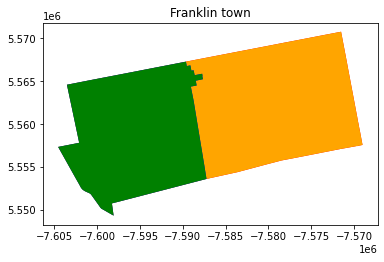

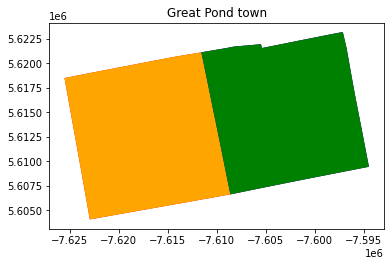

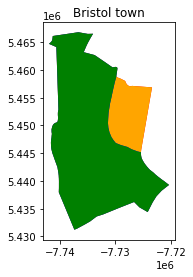

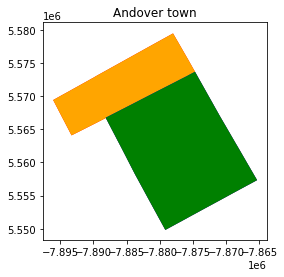

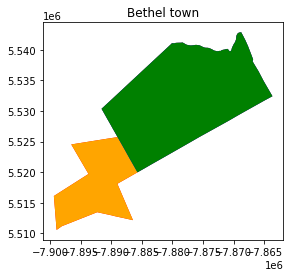

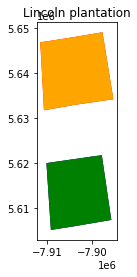

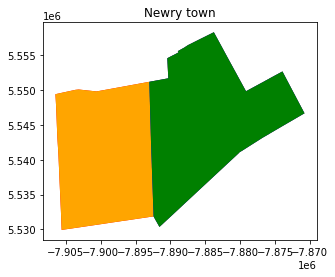

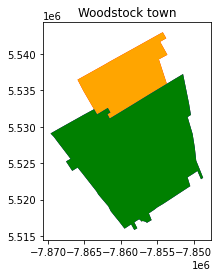

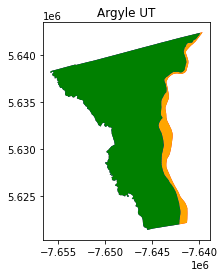

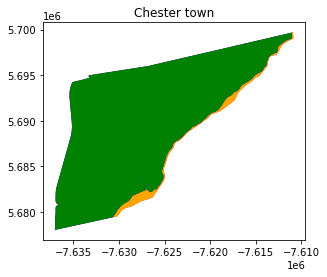

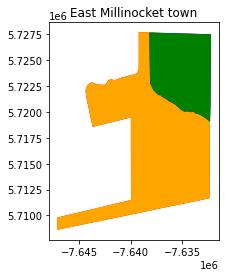

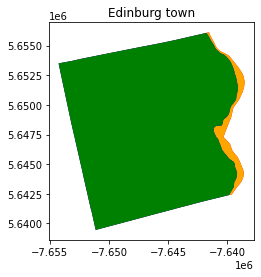

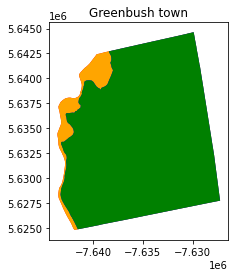

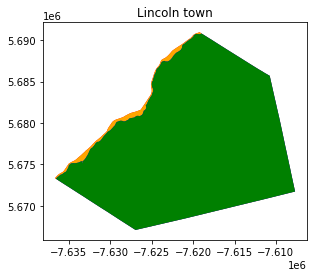

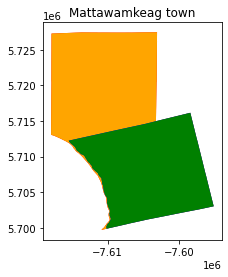

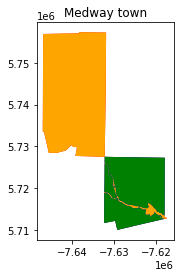

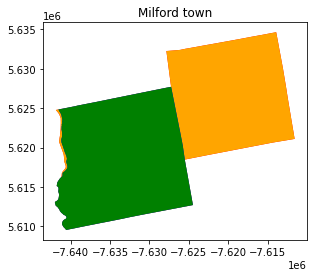

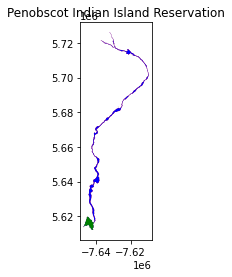

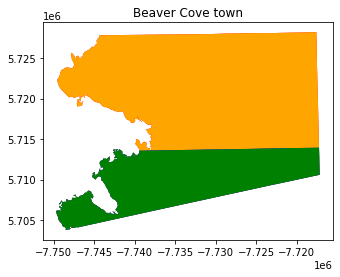

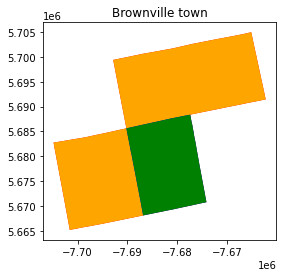

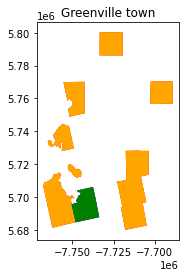

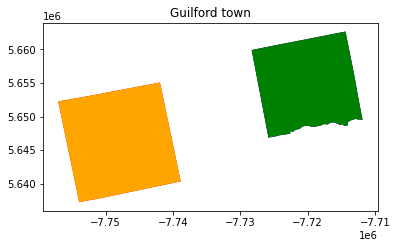

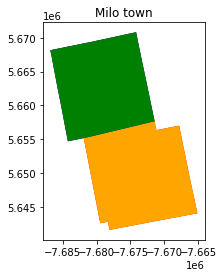

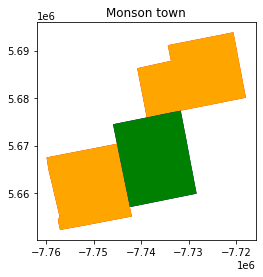

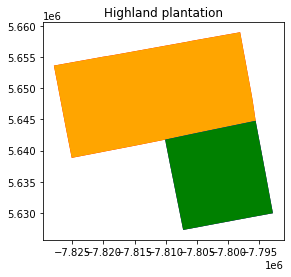

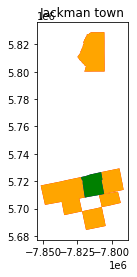

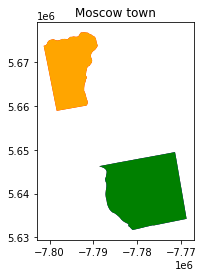

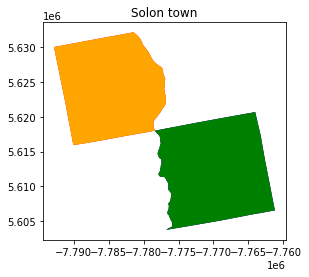

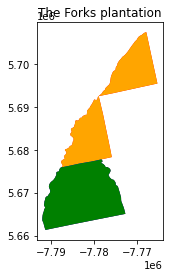

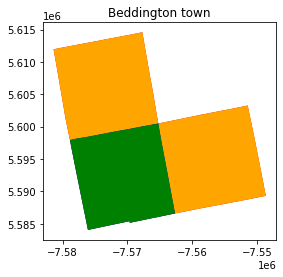

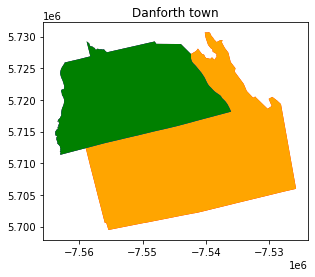

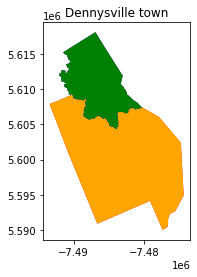

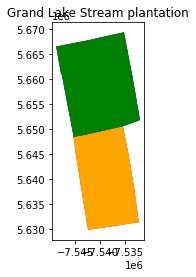

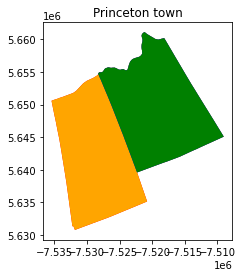

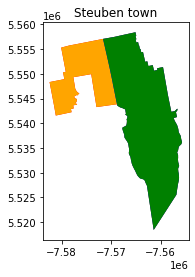

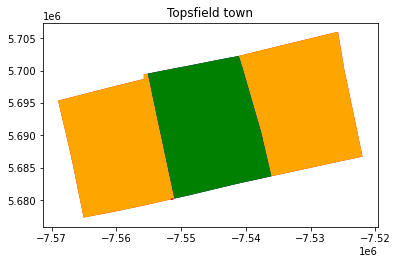

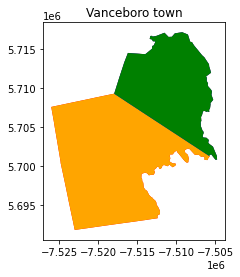

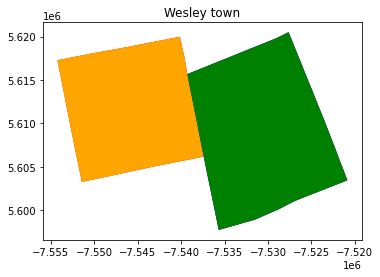

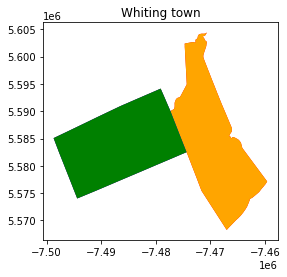

In [230]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [231]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(554, 1)
366 precincts w/ a difference of 0 km^2
81 precincts w/ a difference between 0 and 0.1 km^2
6 precincts w/ a difference between 0.1 and 0.5 km^2
3 precincts w/ a difference between 0.5 and 1 km^2
3 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
50 precincts w/ a difference greater than 5 km^2


In [232]:
# Dissolve on county to get a full county map
counties_source = shapefiles_census_comp.dissolve('COUNTYFP')
counties_vest = vest_shp.dissolve('County_FIPS')

<AxesSubplot:>

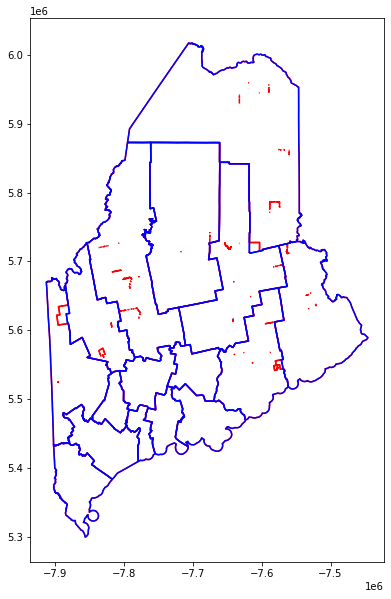

In [233]:
ax = counties_vest.boundary.plot(figsize=(10,10),color='red')
counties_source.boundary.plot(ax=ax,color='blue')

## Summary of towns that were examined more closely  
  
Towns where VEST appeared to match precinct maps:    
-Gorham  
  
Towns where VEST did not appear to match precinct maps:  
-Ellsworth  
  
Towns where we could not find a precinct map:  
-Harpswell  

## Ellsworth Precincts
VEST-VTDs for Biddeford, Ellsworth, Gorham, Harpswell were sourced from township ward maps.

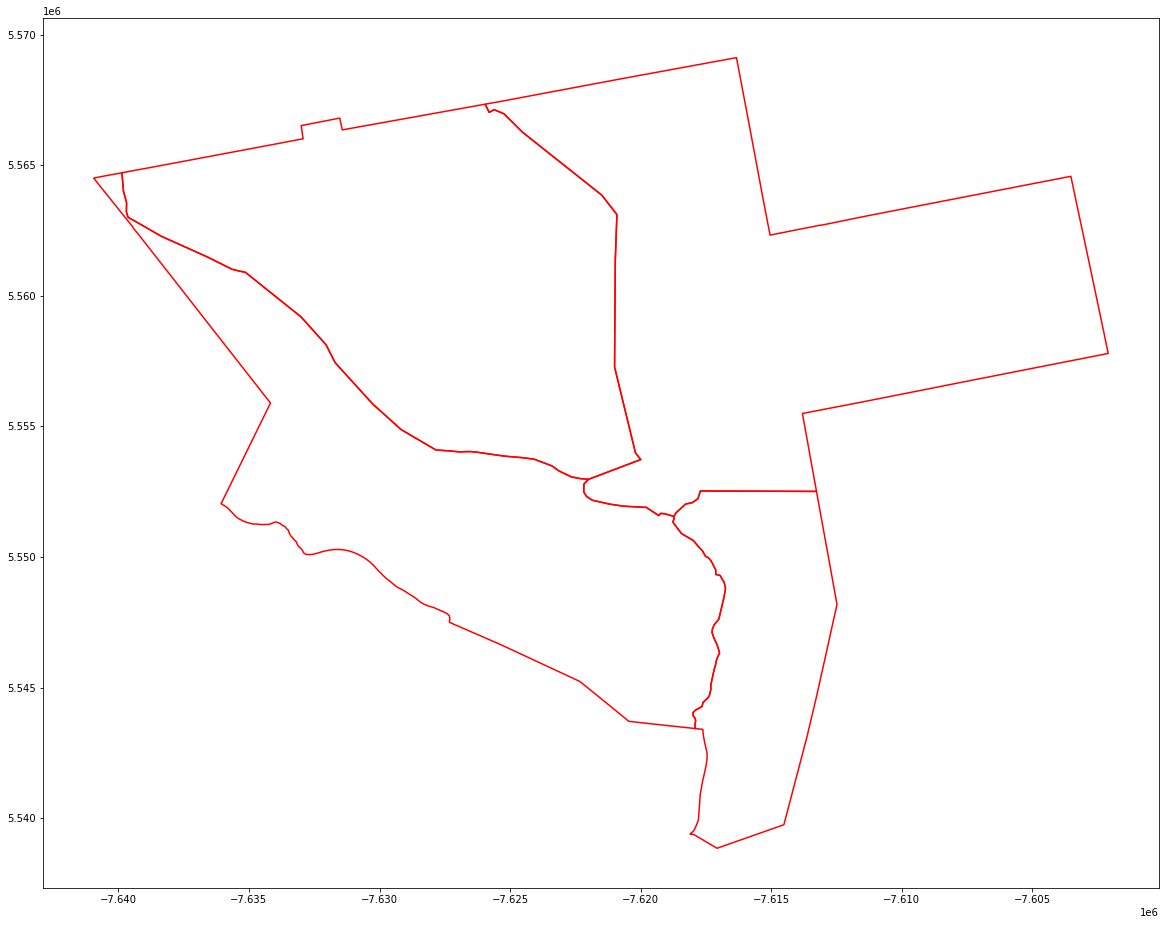

In [234]:
ax = vest_shp[vest_shp['NAME20'].str.contains('Ellsworth')].boundary.plot(figsize=(20,20),color="red")

### VEST's map does not appear to match Ellsworth precinct map. Precinct names appear to match.

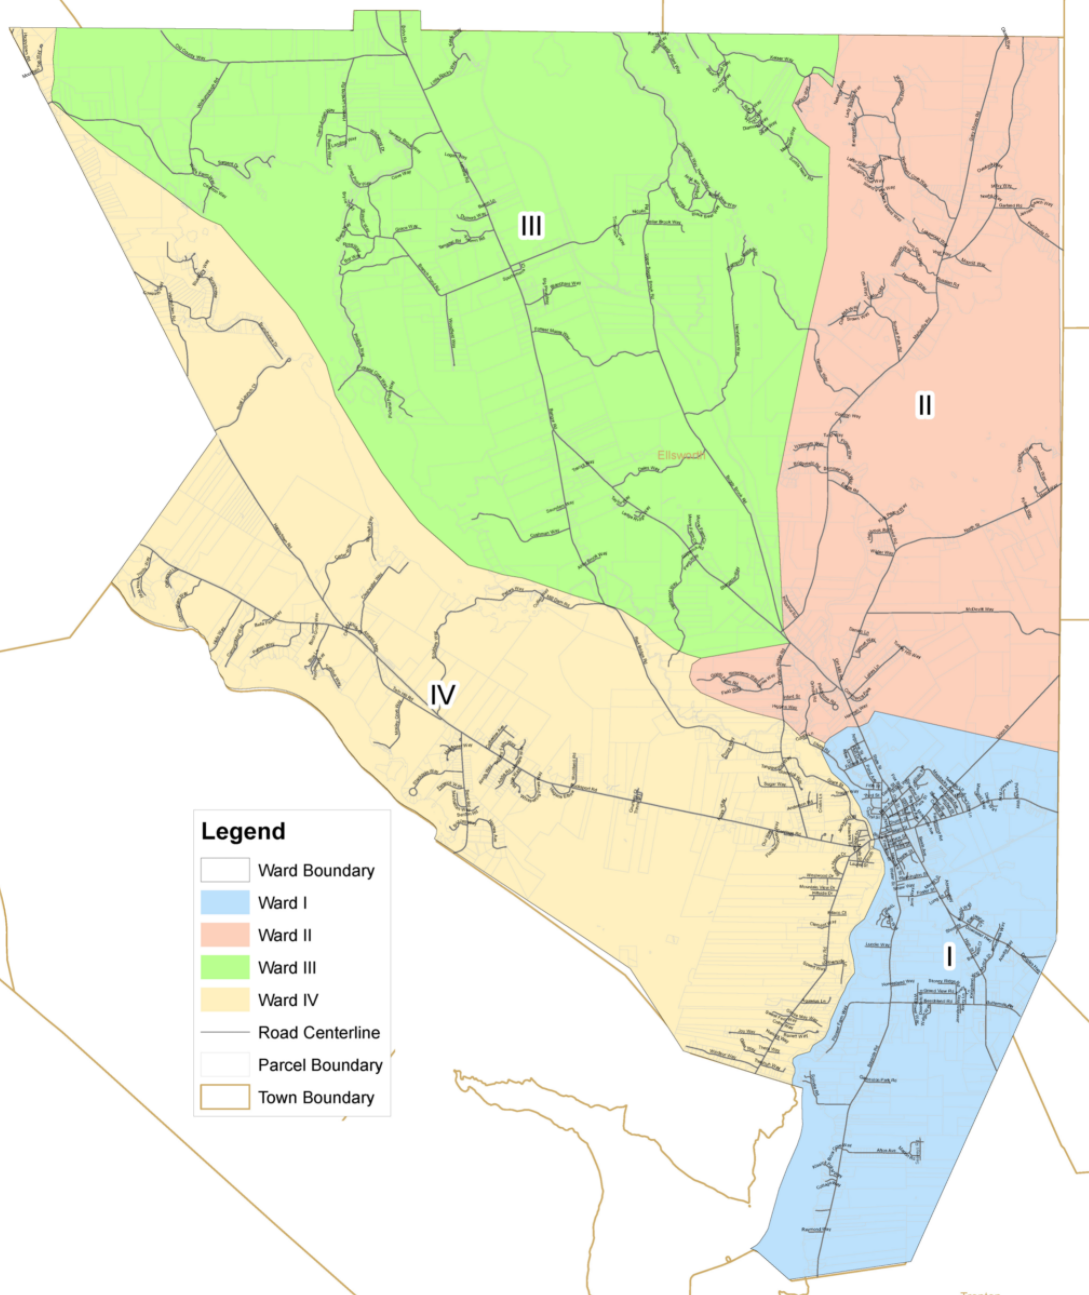

source-https://www.ellsworthmaine.gov/wp-content/uploads/2016/06/Detailed-Ellsworth-Election-Ward-Map-as-of-October-2020.pdf

## Gorham Precincts
VEST-VTDs for Biddeford, Ellsworth, Gorham, Harpswell were sourced from township ward maps.

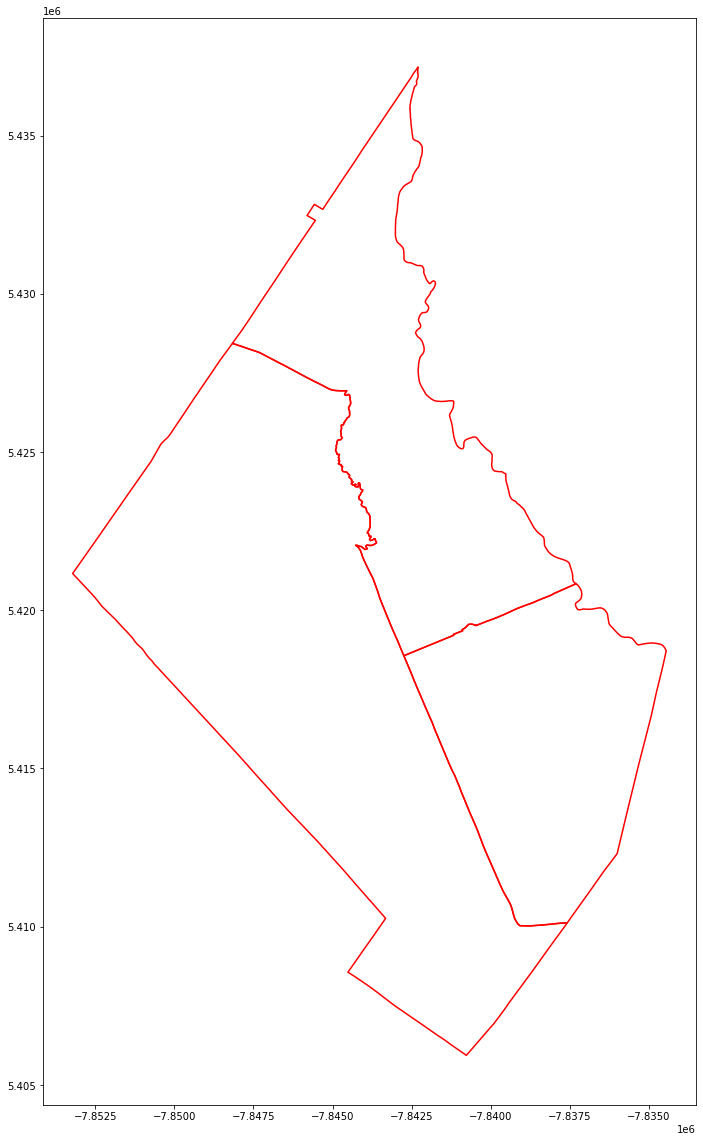

In [235]:
ax = vest_shp[vest_shp['NAME20'].str.contains('Gorham')].boundary.plot(figsize=(20,20),color="red")

### VEST's map appears to match the Gorham precinct map. Precinct Names also appear to match.

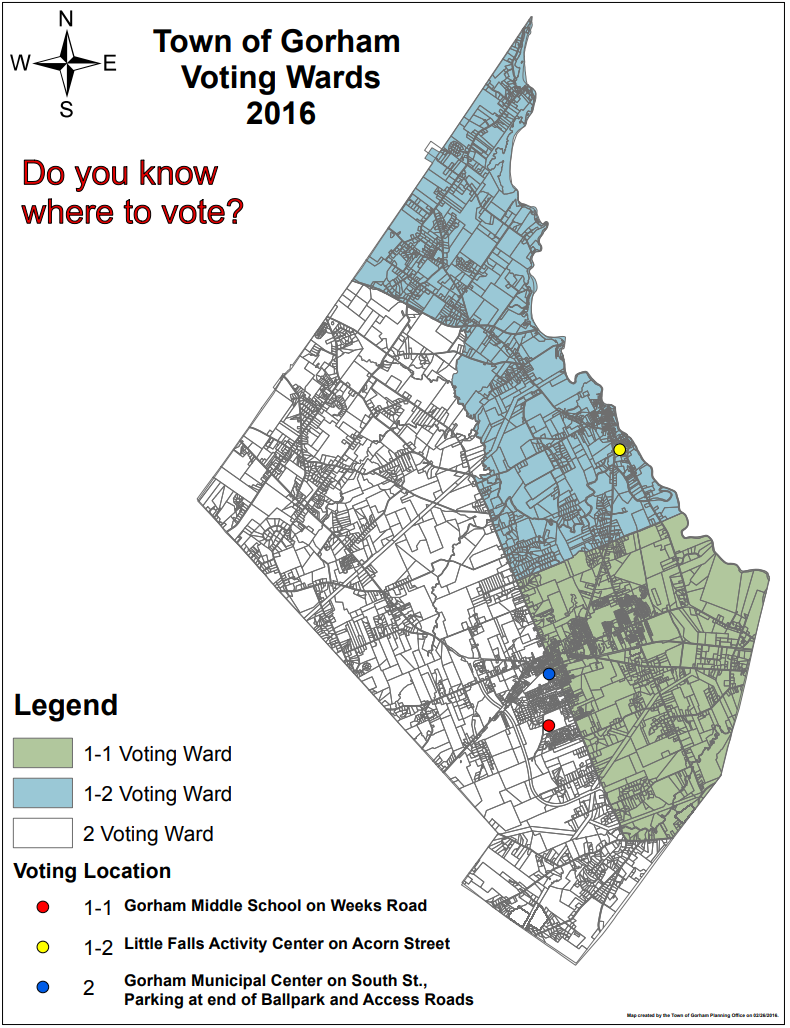

source-https://www.gorham-me.org/sites/g/files/vyhlif4456/f/uploads/voting_ward_map.pdf

## Harpswell Precincts
VEST-VTDs for Biddeford, Ellsworth, Gorham, Harpswell were sourced from township ward maps.

In [236]:
ax = vest_shp[vest_shp['NAME'].str.contains('Harpswell')].boundary.plot(figsize=(20,20),color="red")

KeyError: 'NAME'

### Could not find precinct map for Harpswell